<h1>Lead Scoring Case study - Logistic Regression</h1>

<h3>Problem Statement :</h3>
<p>An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
<p>The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.<br>

<h3>Business Goal :</h3>
<p>To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Approach to achive the goal can be divided into following steps :
1. Data understanding, preparation and EDA

2. Preparing the data for model training (train-test split, rescaling)

3. Training and Optimizating the model

4. Model Evaluation - Accuracy, ROC and confusion metric

5. Prediction on test data set

In [698]:
#supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [699]:
#import Librabries needed for loading data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [700]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

<h3>1. Data understanding, preparation and EDA

<h4>Steps to be followed :</h4>
<ul>
<li>Check for first 10 rows using head</li>
<li>Check the size and shape of dataset</li>
<li>Check the dtype of columns using info</li>
<li>Check for duplicates in dataset</li>
<li>Check for missing values in data using isna</li>
<li>Itentify any unnecessary columns</li>
<li>Identify the outliers</li>

In [701]:
#Import lead data into data frame
lead_df=pd.read_csv('Leads.csv')
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

<h4>1.1 Inspecting dataset

In [702]:
#Lets check the shape of data
lead_df.shape

(9240, 37)

 We can see that there are 9240 records with 37 columns

In [703]:
#Lets check the field information 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are fields with null in it. We will analyze and treat them one by one<br>Lets check null values using panda's isnull method

In [704]:
#checking for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

We will treat these nulls as part of data cleaning activity<br> Checking summary of numerical columns

In [705]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [706]:
#Checking duplicates in data
lead_df.duplicated().sum()

0

Observations :<br>
- There are nulls in the dataset
- `Converted`, which is the target variable, is a categorial variable however it is marked as numerical
- `Total Time Spent on Website`, `Page Views Per Visit` and `TotalVisits` seems to be right skewed. We will check for outliers for the same
- `Converted` is imbalanced with more 0s than 1 (This make sense as conversin rate is only 30%)
- There are no duplicates

<h4>1.2 Data Cleaning</h4>

Lets check null value %age first

In [707]:
#check the %age of nulls using isnull
lead_df.isnull().mean().sort_values(ascending=False)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

These are few columns with lots of nulls in them. 
We will list out such columns take %age nulls of them

As mentioned in problem statement there are features with <font color='red'><b>'Select'</font></b> value in it. <br>
Since, 'Select' is the default value in a drop the menu. This implies values were not selected and should be treated as missing
<br>Let us find the columns which has 'select' in it<br>

In [708]:
# Identify features which has 'select' as a value
select_value_features = [col for col in lead_df.columns if len(lead_df[col].isin(['Select']).unique())>1]
print(select_value_features)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


As imperative from above, `Specialization`, `How did you hear about X Education`, `Lead Profile` & `City` has select. <br>Let's analyze these columns

In [709]:
for col in select_value_features:
    print('*'*20,col,'*'*20)
    print(lead_df[col].value_counts())
    

******************** Specialization ********************
Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
******************** How did you hear about X Education ********************
How did you hear about X Ed

We can see there are lot of 'Select' in these columns.
Let us check the percent of value count

In [710]:
for col in select_value_features:
    print('*'*20,col,'*'*20)
    print(100*lead_df[col].value_counts()/len(lead_df.index))

******************** Specialization ********************
Specialization
Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: count, dtype: float64
*******

Percentage of 'Select' is 21, 54, 44 and 34 in columns `Specialization`, `How did you hear about X Education`, `Lead Profile` & `City` respectively
<br>Since 'Select' is as good as null, this leads to high nulls for these columns<br>

We will replace 'Select' with null (np.nan) and rechek our null column %

In [711]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [712]:
#create a function to generate missing columns df with columns as Column_name, null_cnt and null_prt
def create_missing_df(data_df):
    #Check nulls as count and percentage of total value for better understanding
    mvc = pd.DataFrame({
    'null_cnt' : data_df.isnull().sum(),
    'null_prt' : round(data_df.isnull().mean()*100,2)
    })

    mvc=mvc.sort_values(by='null_cnt',ascending=False)
    #just keep columns with null count > 0
    mvc=mvc[mvc.null_cnt > 0].reset_index()
    mvc.rename(columns={'index' : 'Column_name'},inplace=True)
    return mvc

In [713]:
missing_value_cols=create_missing_df(lead_df)
missing_value_cols

Column_name  null_cnt  null_prt
0              How did you hear about X Education      7250     78.46
1                                    Lead Profile      6855     74.19
2                                    Lead Quality      4767     51.59
3                      Asymmetrique Profile Score      4218     45.65
4                     Asymmetrique Activity Score      4218     45.65
5                     Asymmetrique Activity Index      4218     45.65
6                      Asymmetrique Profile Index      4218     45.65
7                                            City      3669     39.71
8                                  Specialization      3380     36.58
9                                            Tags      3353     36.29
10  What matters most to you in choosing a course      2709     29.32
11                What is your current occupation      2690     29.11
12                                        Country      2461     26.63
13                           Page Views Per Visit       137      1.48
14                                    TotalVisits       137      1.48
15                                  Last Activity       103      1.11
16                                    Lead Source        36      0.39

We can see that null percent has gone up for these columns. <br>
We will drop the features which has >40% nulls. 
<br>We will verify other columns one by one

In [714]:
#add all these features into a list
#From missing value list select features where null % is greater than 30%
drop_column_list=list(missing_value_cols[missing_value_cols.null_prt > 40].Column_name)
drop_column_list


['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

We will now check columns where missing value is < 40% but higher than 10%.

In [715]:
#Lets make use of missing_value_cols again
missing_value_cols[(missing_value_cols.null_prt >  10) &  (missing_value_cols.null_prt < 40)]

Column_name  null_cnt  null_prt
7                                            City      3669     39.71
8                                  Specialization      3380     36.58
9                                            Tags      3353     36.29
10  What matters most to you in choosing a course      2709     29.32
11                What is your current occupation      2690     29.11
12                                        Country      2461     26.63

******************** City ********************
City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


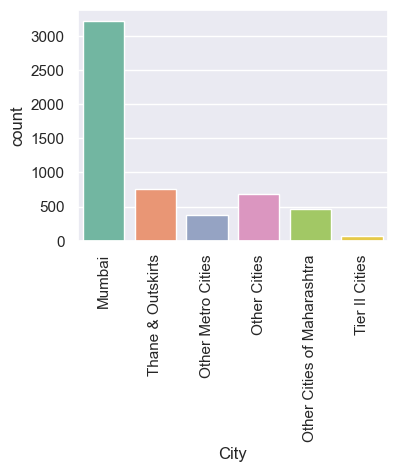

******************** Specialization ********************
Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64


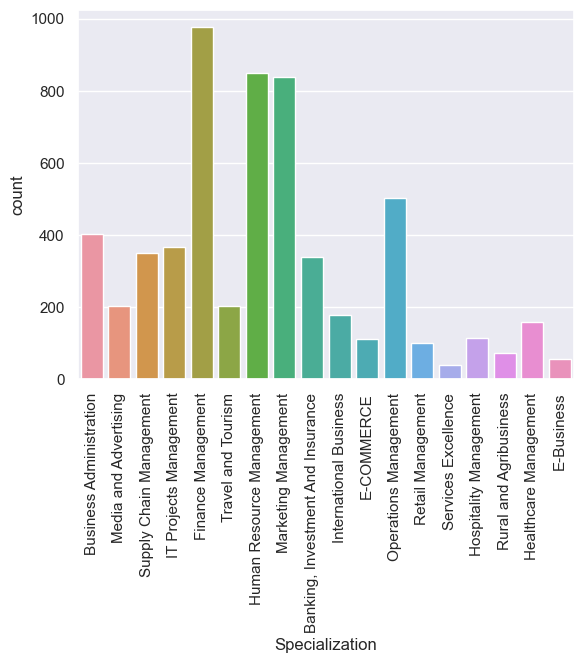

******************** Tags ********************
Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS  

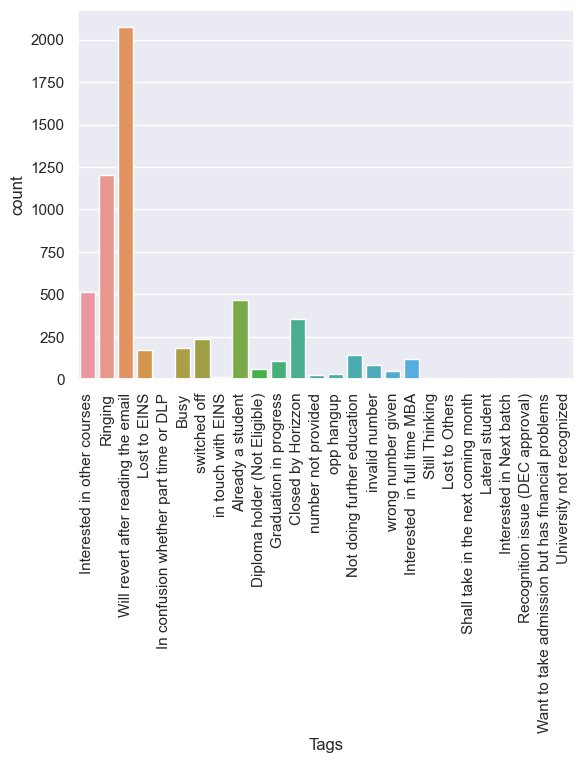

******************** What matters most to you in choosing a course ********************
What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


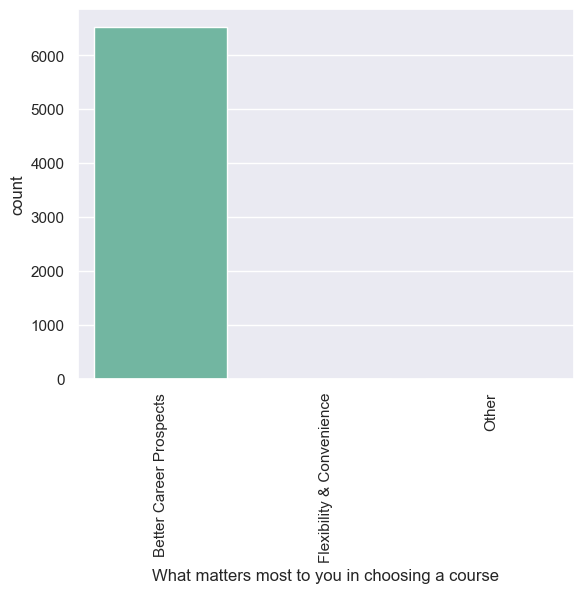

******************** What is your current occupation ********************
What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


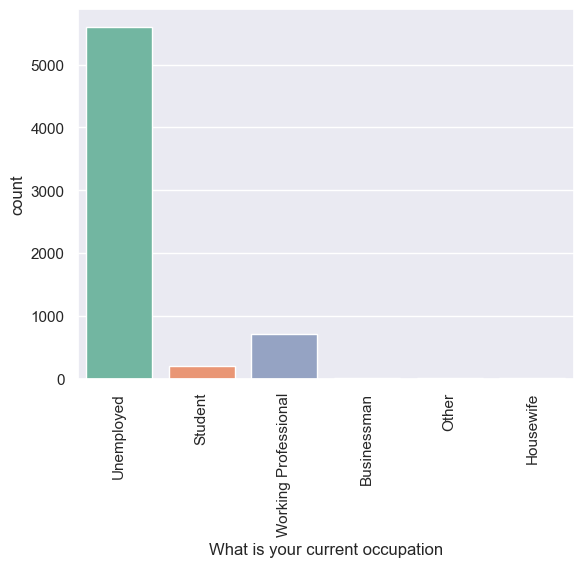

******************** Country ********************
Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania      

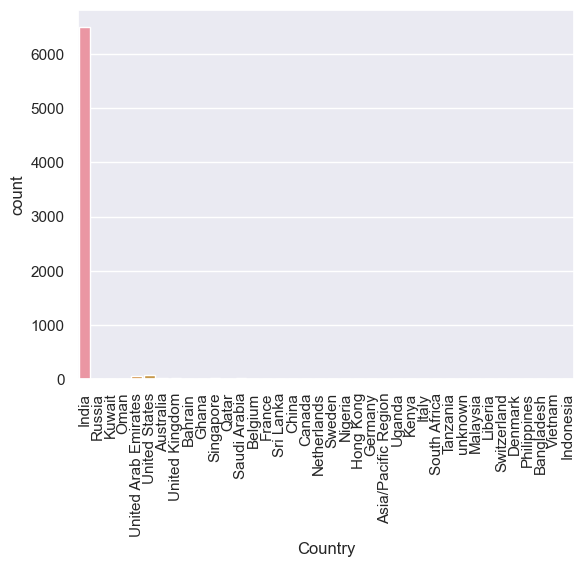

In [716]:
#Check values count for each of these columns and plot them 
plt.figure(figsize=[4,3])
for col in list(missing_value_cols[(missing_value_cols.null_prt >  10) &  (missing_value_cols.null_prt < 40)].Column_name):
    print('*'*20,col,'*'*20)
    print (lead_df[col].value_counts())
    sns.countplot(x=lead_df[col],)
    plt.xticks(rotation=90)
    plt.show()

Observations and actions:
- `City` : It has around 39.71% (3669) of nulls. If we impute  them with the mode, i.e. 'Mumbai'; then this feature will be highly skewed. 'Mumbai''s count will become 6891. Which will be around 75% of data. Hence it is better to <font color='red'>drop</font> `City`
- `Specialization` - This column and 3380 nulls which account for 36.5% of values. We do not see any major imbalance in the data as well. Since these values are part of a drop down menu, it may be the case that the specilization is not the one which are present in drop down. Hence, we will <font color='green'>impute</font> the missing values with 'Others' rather than dropping the column.
- `Tags` : Tags has 36.29 % missing values. Further data is highly skewed with 2072 rows for 'Will revert after reading the email'. Imputing it with mode will skew the data further. Also, as per data dictionary 'Tags are assigned to customers indicating the current status of the lead.'. Since it is just the current status we will <font color='red'>drop</font> `Tags`
- `What matters most to you in choosing a course` : This as 29.3% of null values. Moreover, looking at the value distribution it has 6528 records as 'Better Career Prospects' which accounts to 74% of values. Since apprx. there are only one type of values in it we will <font color='red'>drop</font> `What matters most to you in choosing a course`
- `What is your current occupation` : There are 29% missing value for it and data is also skewed with most of the values for `Unemployed`. Imputing it with mode will skew the data more and it will not be good for model. However, occupation might be an important feature to consider. We will check the distribution of `Converted` once before taking any decision.
- `Country` : With 26% nulls and highy skewed data for 'India' it would be better to <font color='red'>drop</font> `country`

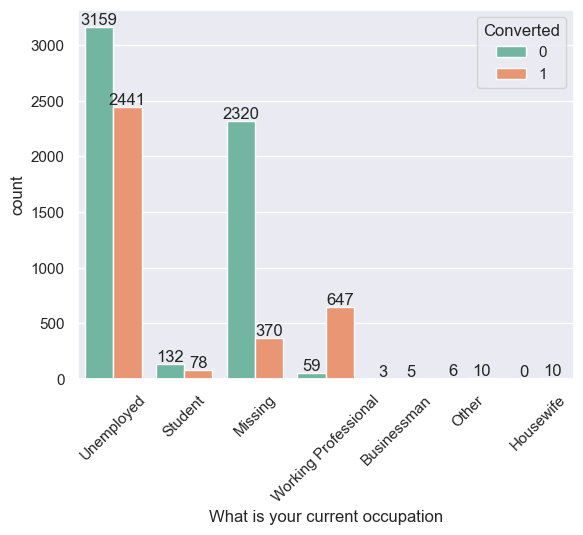

In [717]:
#Lets check 'What is your current occupation' wrt target variable
occ_df=lead_df.fillna('Missing',axis=1)
ax=sns.countplot(x=occ_df["What is your current occupation"], hue='Converted',data=occ_df)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

Observation : 
- Working Professionals going for the course have high chances of joining it.
- Number of converted is highest for unemployed. Which shows ~40% conversion rate which is higher than the average of 30% mentioned in problem description
- Imputing with mode value (unemployed) will skew the data more. However, Since there is already a category called Others we can assume that leads with no occupation are unemployed and impute the same

In [718]:
#extend our drop list with observation mentioned above
drop_column_list = drop_column_list + ['City','Tags','What matters most to you in choosing a course','Country']

In [719]:
drop_column_list

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Tags',
 'What matters most to you in choosing a course',
 'Country']

<h4>Execute our actions :</h4>

1. Impute Specialization with Others
2. Impute "What is your current occupation" with Unemployed
3. Drop columns which are in drop_column_list

In [720]:
#1. Impute Specialization
lead_df['Specialization'].fillna('Others',inplace=True)
lead_df.Specialization.value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [721]:
#2. Impute "What is your current occupation" with Unemployed
lead_df['What is your current occupation'].fillna('Unemployed',inplace=True)

In [722]:
#3. Drop columns which are in drop_column_list
print("Shape before Drop :",lead_df.shape)
lead_df=lead_df.drop(columns=drop_column_list,axis=1) 
print("Shape after Drop :",lead_df.shape)

Shape before Drop : (9240, 37)
Shape after Drop : (9240, 26)


We can see 11 columns has been dropped<br>
Lets again check the null counts

In [723]:
missing_value_cols_after=create_missing_df(lead_df)
missing_value_cols_after

Column_name  null_cnt  null_prt
0           TotalVisits       137      1.48
1  Page Views Per Visit       137      1.48
2         Last Activity       103      1.11
3           Lead Source        36      0.39

Let us analyse these feature to leave them as is or impute

In [724]:
#Check info of these columns
lead_df[list(missing_value_cols_after.Column_name)].info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TotalVisits           9103 non-null   float64
 1   Page Views Per Visit  9103 non-null   float64
 2   Last Activity         9137 non-null   object 
 3   Lead Source           9204 non-null   object 
dtypes: float64(2), object(2)
memory usage: 288.9+ KB


`TotalVisits` and `Page Views Per visit` are numerical columns whereas, `Last Activity` and `Lead Source` are categorical<br>
Lets check the value counts for these columns

In [725]:
for col in list(missing_value_cols_after.Column_name):
    print(lead_df[col].value_counts().head())
    print('-'*50)


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: count, dtype: int64
--------------------------------------------------
Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: count, dtype: int64
--------------------------------------------------
Last Activity
Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: count, dtype: int64
--------------------------------------------------


We will impute `TotalVisits` & `Page Views Per visit` with median and `Last Activity` & `Lead Source` with mode

In [726]:
#imputing the values
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(), inplace=True)
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(), inplace=True)
lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0], inplace=True)
lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0], inplace=True)


Recheck the nulls after imputing

In [727]:
missing_value_cols_after=create_missing_df(lead_df)
missing_value_cols_after

Empty DataFrame
Columns: [Column_name, null_cnt, null_prt]
Index: []

There are no Nulls in the data now

<h3>1.3 Identify and remove unwanted features

While removing nulls we came across columns like `country` and `What matters most to you in choosing a course` where data was highlt skewed.<br>In other words thre count for one value was extremly high<br>
It would be wise to check for similar trends on other features as well

In [728]:
#Check for number of unique values for each of the features
lead_df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

We can see that columns `Prospect ID` and `Lead Number` had all the unique values as they act like row identifier<br>We can drop these as it will not help in model building.<br>There are lot of categorical columns where values are 1 or two. <br>We should drop the columns with unique values 1.<br> For value count 2 We will check them for data imbalance

In [729]:
#add these to drop_column_list list
drop_column_list= ['Magazine','X Education Forums','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

drop_column_list = drop_column_list + ['Prospect ID','Lead Number']
drop_column_list

['Magazine',
 'X Education Forums',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Lead Number']

In [730]:
#dropping these columns
print("Shape before dropping :" ,lead_df.shape)
lead_df.drop(columns=drop_column_list,axis=1,inplace=True)
print("Shape after dropping :", lead_df.shape)

Shape before dropping : (9240, 26)
Shape after dropping : (9240, 18)


<h3>1.3.2 Checking skewness</h3>

<br>We will now check skewness for columns where unique values were more than 1

In [731]:
lead_df.select_dtypes(include=['category', 'object']).columns.tolist()

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

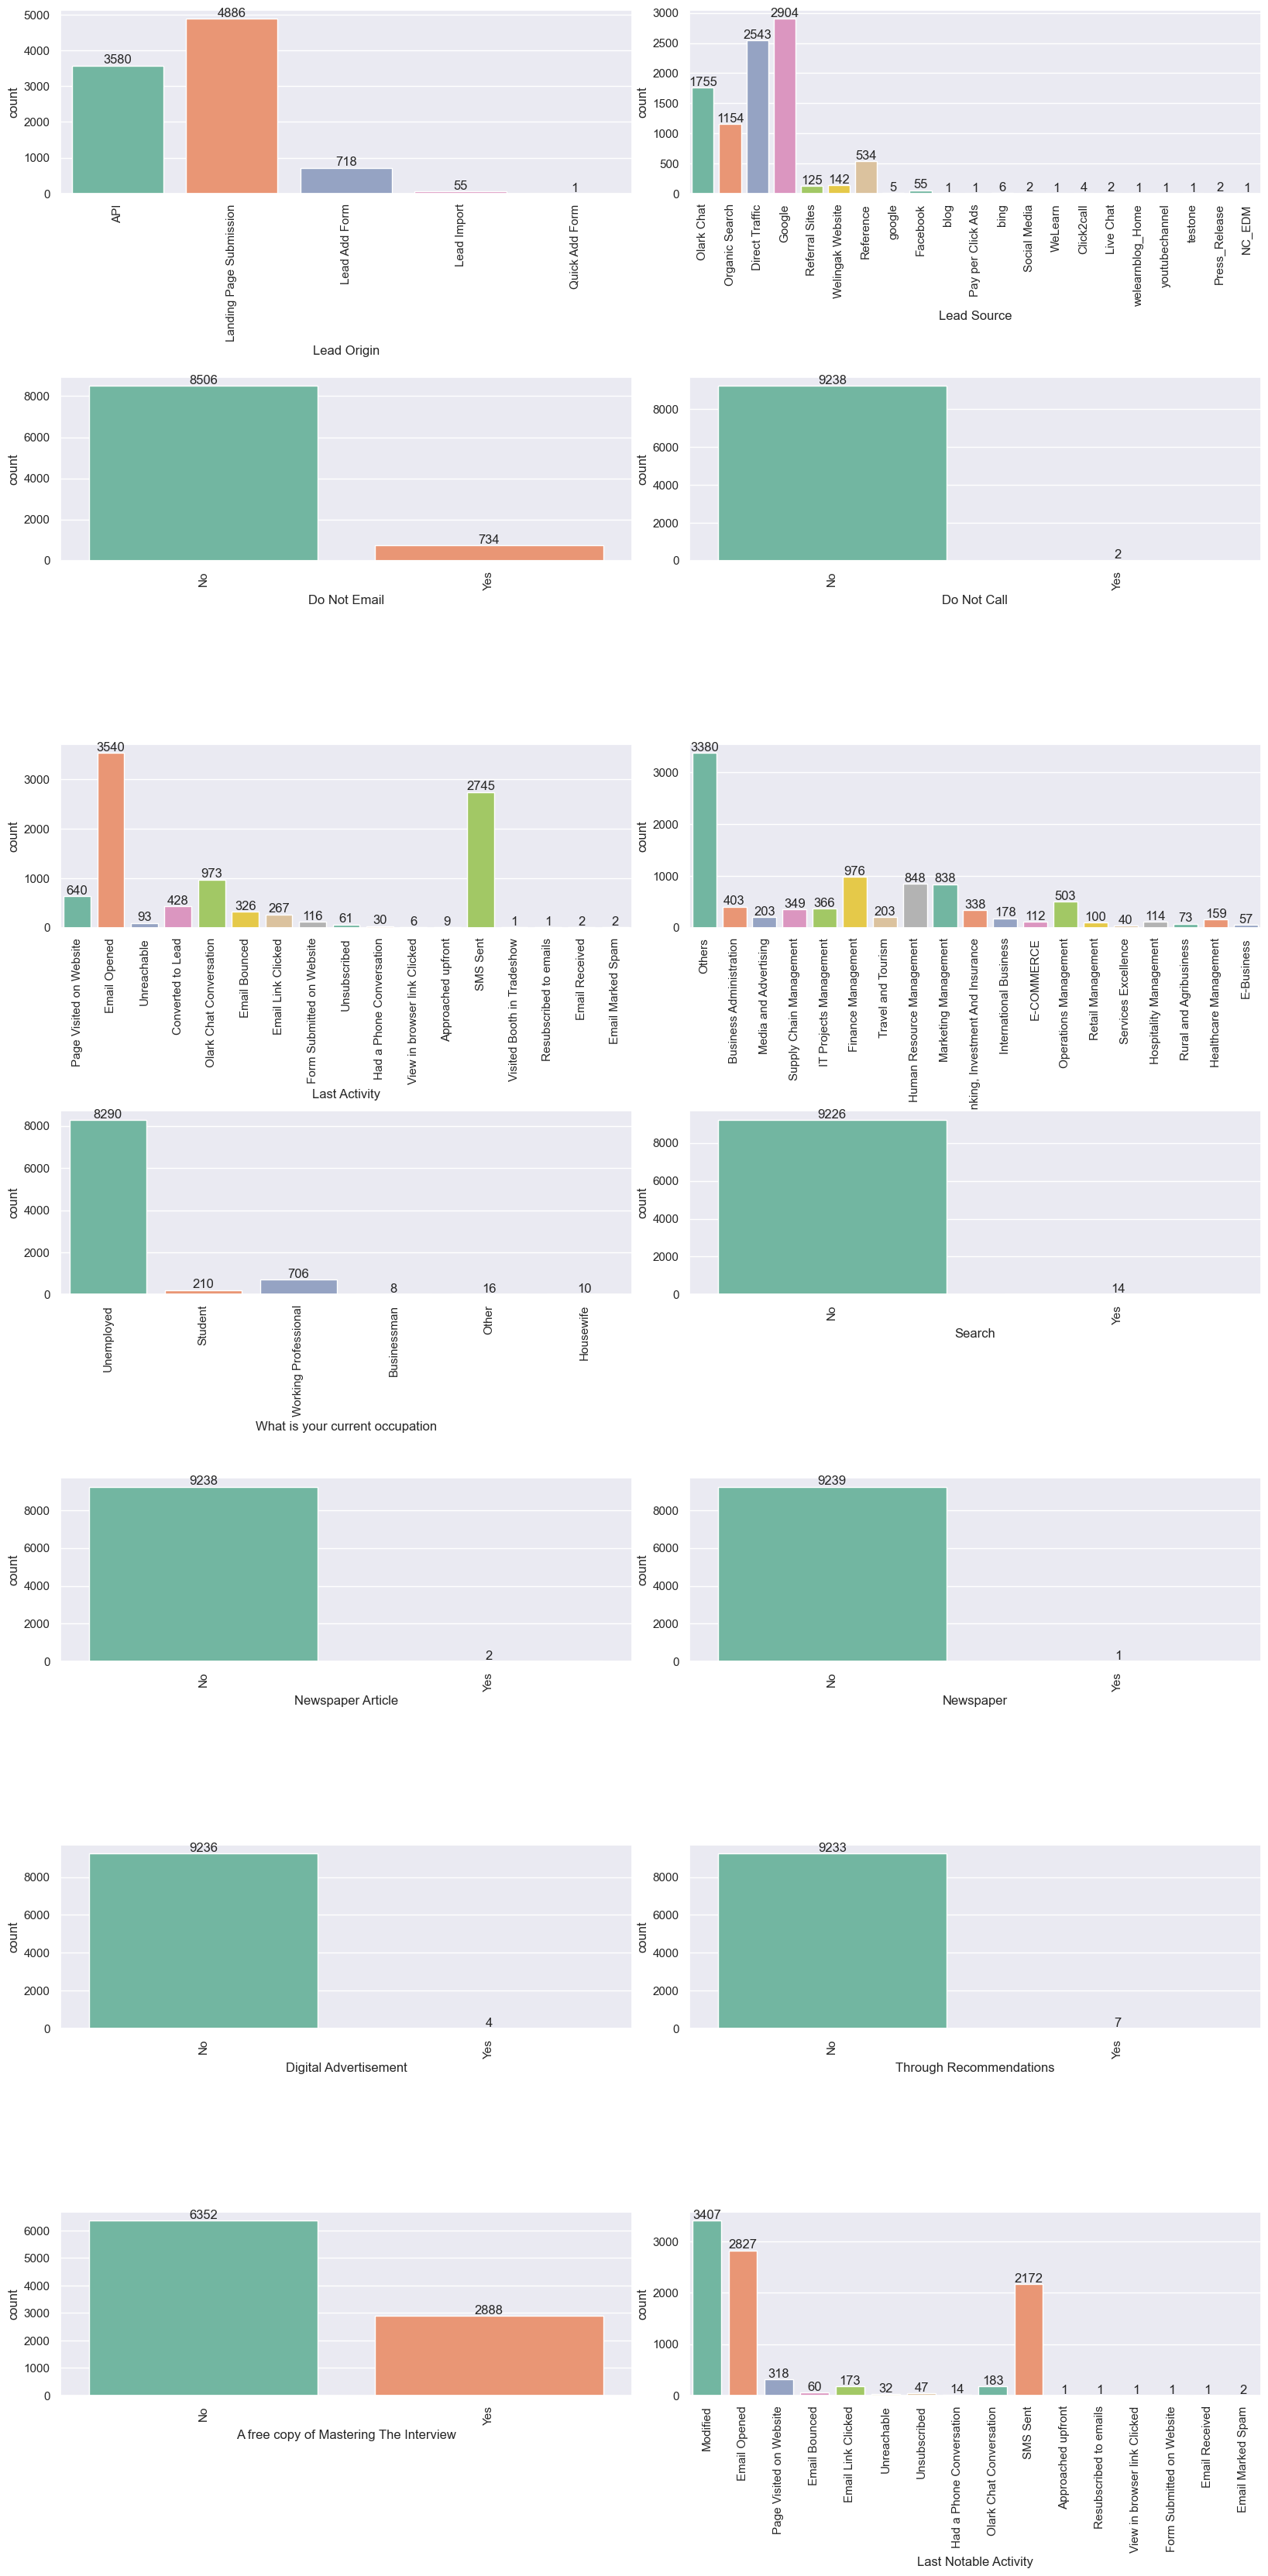

In [732]:
# plotting countplot for object dtype and histogram for number to get data distribution
cat_features = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20,40))
plt.subplots_adjust(wspace=.1,hspace=1)
for i,col in enumerate(cat_features):
    plt.subplot(7,2, i+1)
    ax=sns.countplot(x=col,data=lead_df,palette='Set2') 
    
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()


Observation:<br>
1. Following columns has approximately same value and are equivalent to nunique=1, these will be dropped :
- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'

2. Even data for `Do Not Email ` is highly skewed but we will keep this feature<br>
3. `Lead Source` need some data standardization. There are same value with Initcap and lower cap (Google and google); also there are many values with count in single digit. These can be clubbed into a single category as this will benifit in lesser dummy variables

In [733]:
drop_column_list = ['Do Not Call','Search','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations']
print("Shape before dropping :" ,lead_df.shape)
lead_df.drop(columns=drop_column_list,axis=1,inplace=True)
print("Shape after dropping :", lead_df.shape)

Shape before dropping : (9240, 18)
Shape after dropping : (9240, 12)


In [734]:
lead_df['Lead Source'].replace('google','Google',inplace=True)
lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others",inplace=True)
lead_df['Lead Source'].value_counts()


Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

<h3>1.4 EDA - Univariate, Bivariate and Outlier Analysis</h3>

In [735]:
#create seperate lists for object and numerical columns
object_type_cols=lead_df.select_dtypes(include=['object']).columns.tolist()
num_type_cols=lead_df.select_dtypes(include=['number']).columns.tolist()
print(len(object_type_cols),object_type_cols)
print(len(num_type_cols),num_type_cols)

8 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']
4 ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


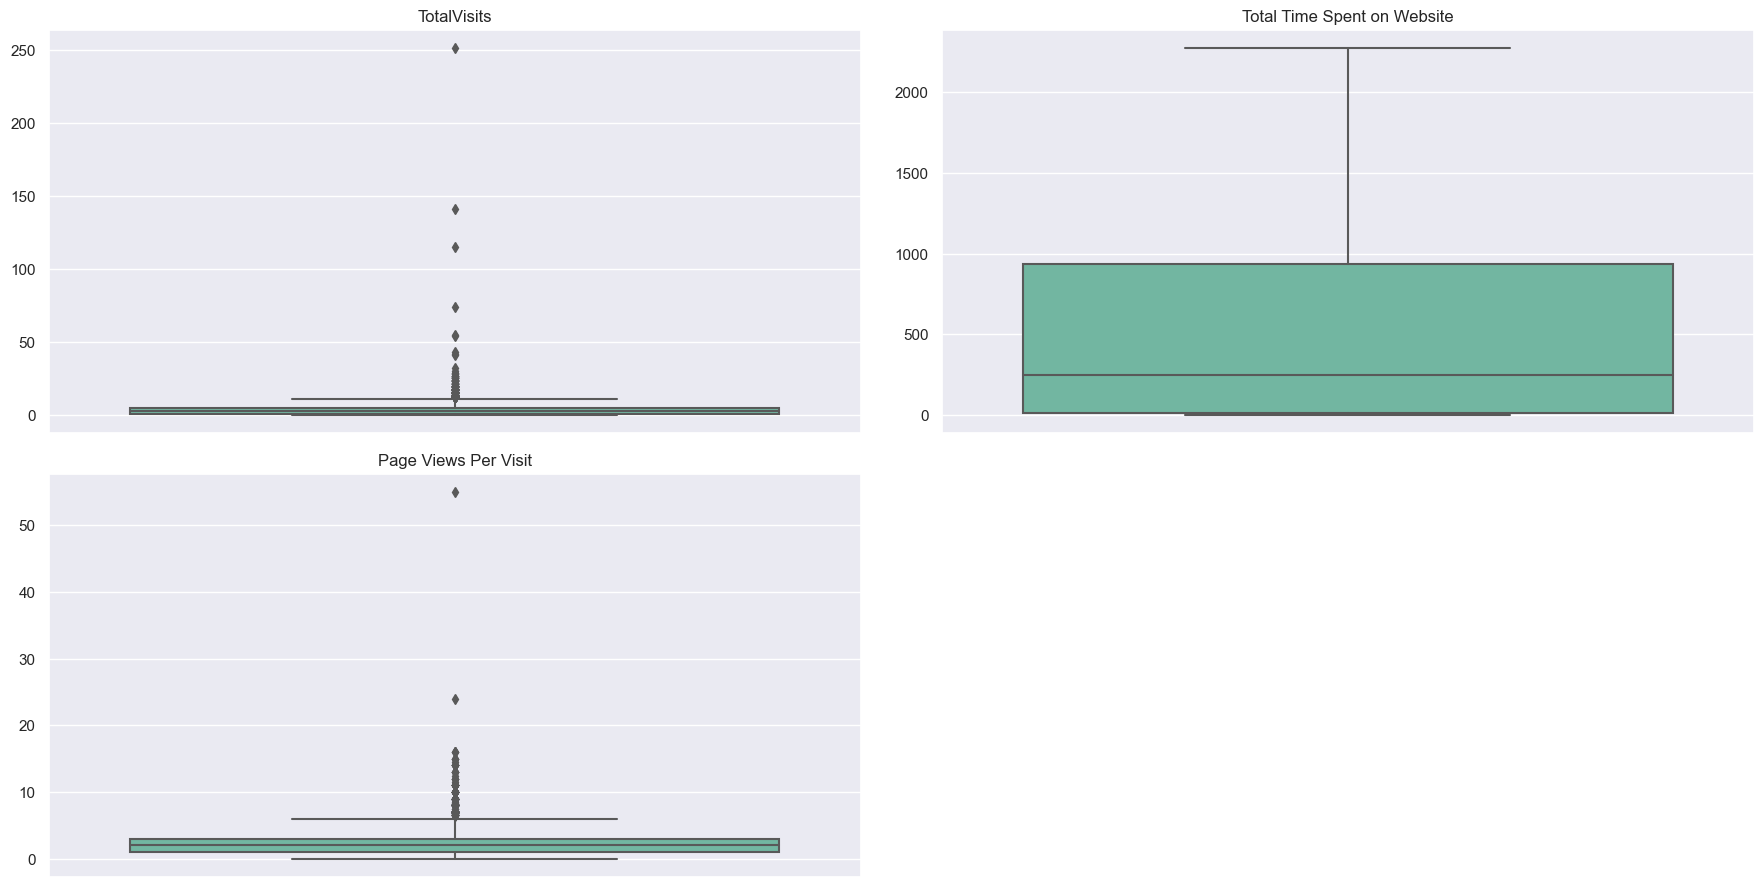

In [736]:
#remove Converted as it is the target variable
num_type_cols.remove('Converted')
#Box plot numerical columns to check outliers
plt.figure(figsize=[22,11])
plt.subplots_adjust(wspace=0.1,hspace=0.1)

for i,col in enumerate(num_type_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=lead_df[col],palette='Set2')
    plt.ylabel(None)
    plt.title(col)

Observation :
- We could see that there continuous outliers for `TotalVisits` and `Page Views Per Visit` well outside of IQR
- There are no outliers for `Total Time Spent on Website` and all values are under the IQR

In [737]:
#Checks values at different percentiles
lead_df.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
5%        0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
5%                 0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

We can use capping method to cap values at 99 percentile

In [738]:
for col in ['TotalVisits','Page Views Per Visit']:
    pct = lead_df[col].quantile([0.05,0.95]).values
    print("Percentile value :", pct)
    lead_df[col][lead_df[col] >= pct[1]] = pct[1]

Percentile value : [ 0. 10.]
Percentile value : [0. 6.]


In [739]:
#Checks values at different percentiles again
lead_df.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.179221                   487.698268   
std       0.486714     2.761219                   548.021466   
min       0.000000     0.000000                     0.000000   
5%        0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    10.000000                  1840.610000   
max       1.000000    10.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.255105  
std                1.779471  
min                0.000000  
5%                 0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                6.000000  
max                6.000000

It seems data has been capped at 99 percentile<br>
We will again do a boxplot to check same

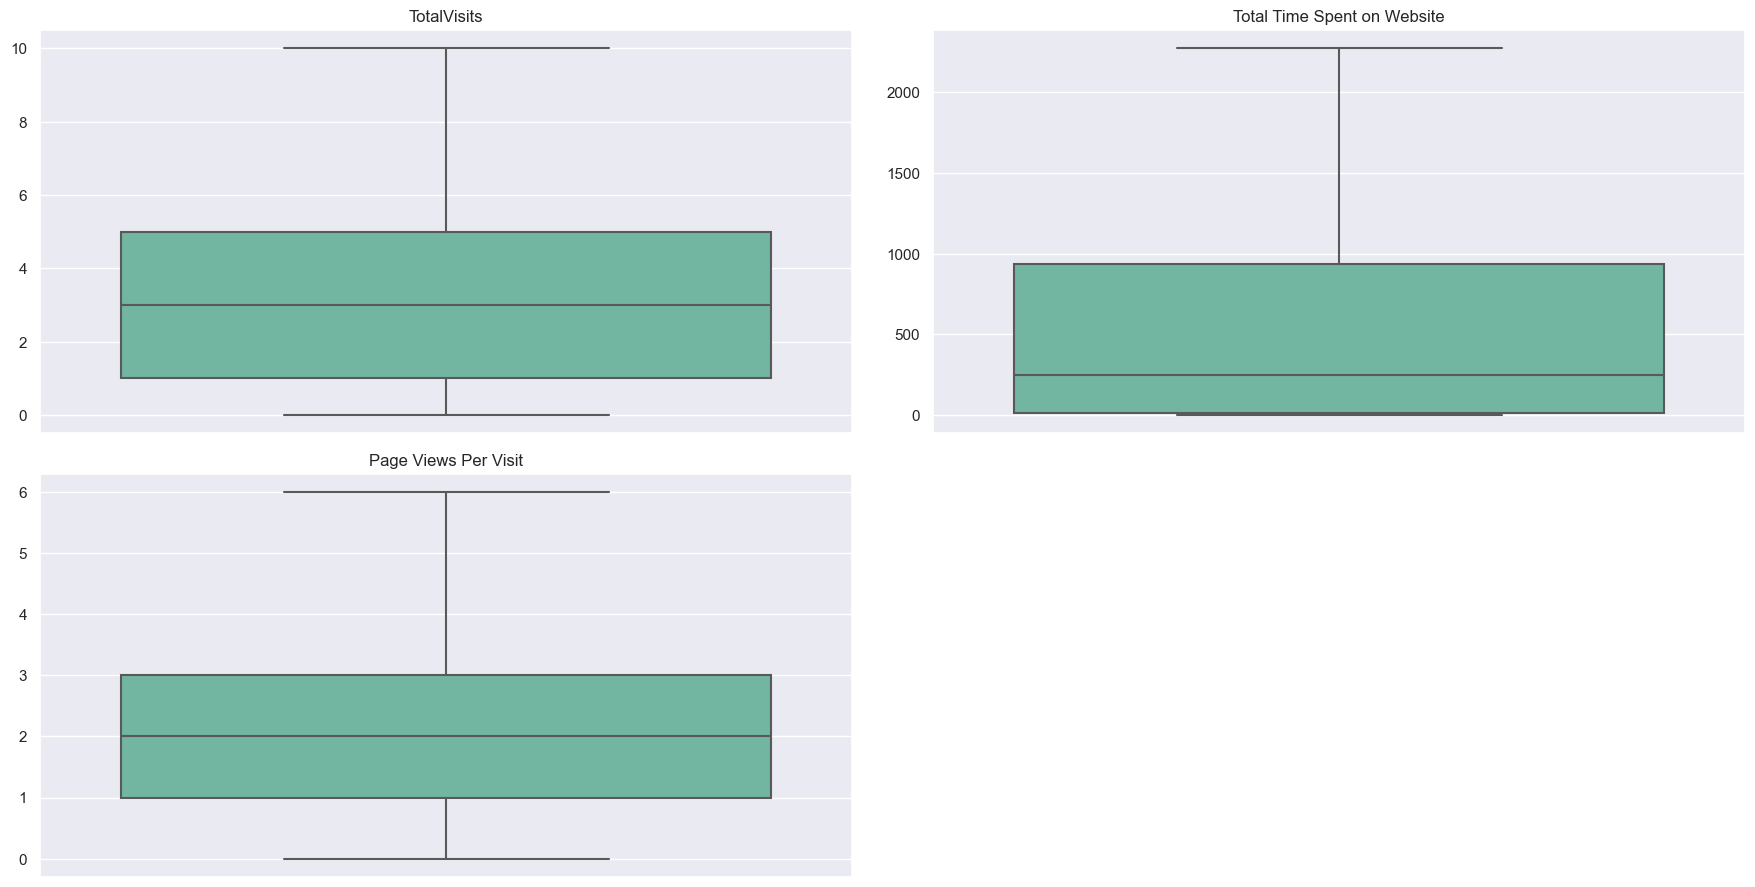

In [740]:
#Box plot numerical columns to check outliers
plt.figure(figsize=[22,11])
plt.subplots_adjust(wspace=0.1,hspace=0.1)

for i,col in enumerate(num_type_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=lead_df[col],palette='Set2')
    plt.ylabel(None)
    plt.title(col)

There are no outliers now<br>
<h4>1.4.2 Data Imbalance

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


<Axes: xlabel='Converted', ylabel='count'>

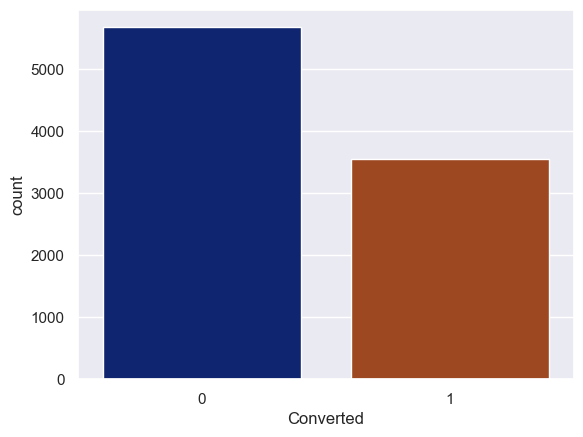

In [741]:
print(lead_df.Converted.value_counts(normalize=True)*100)
sns.countplot(x=lead_df.Converted,palette='dark')

Data is imbalance with 38% as 1/True and 62% as 0/False.<br> This is inline with the problem statement that conversion rate is only ~30%

<h4>1.4.3 Univariate Analysis</h4>

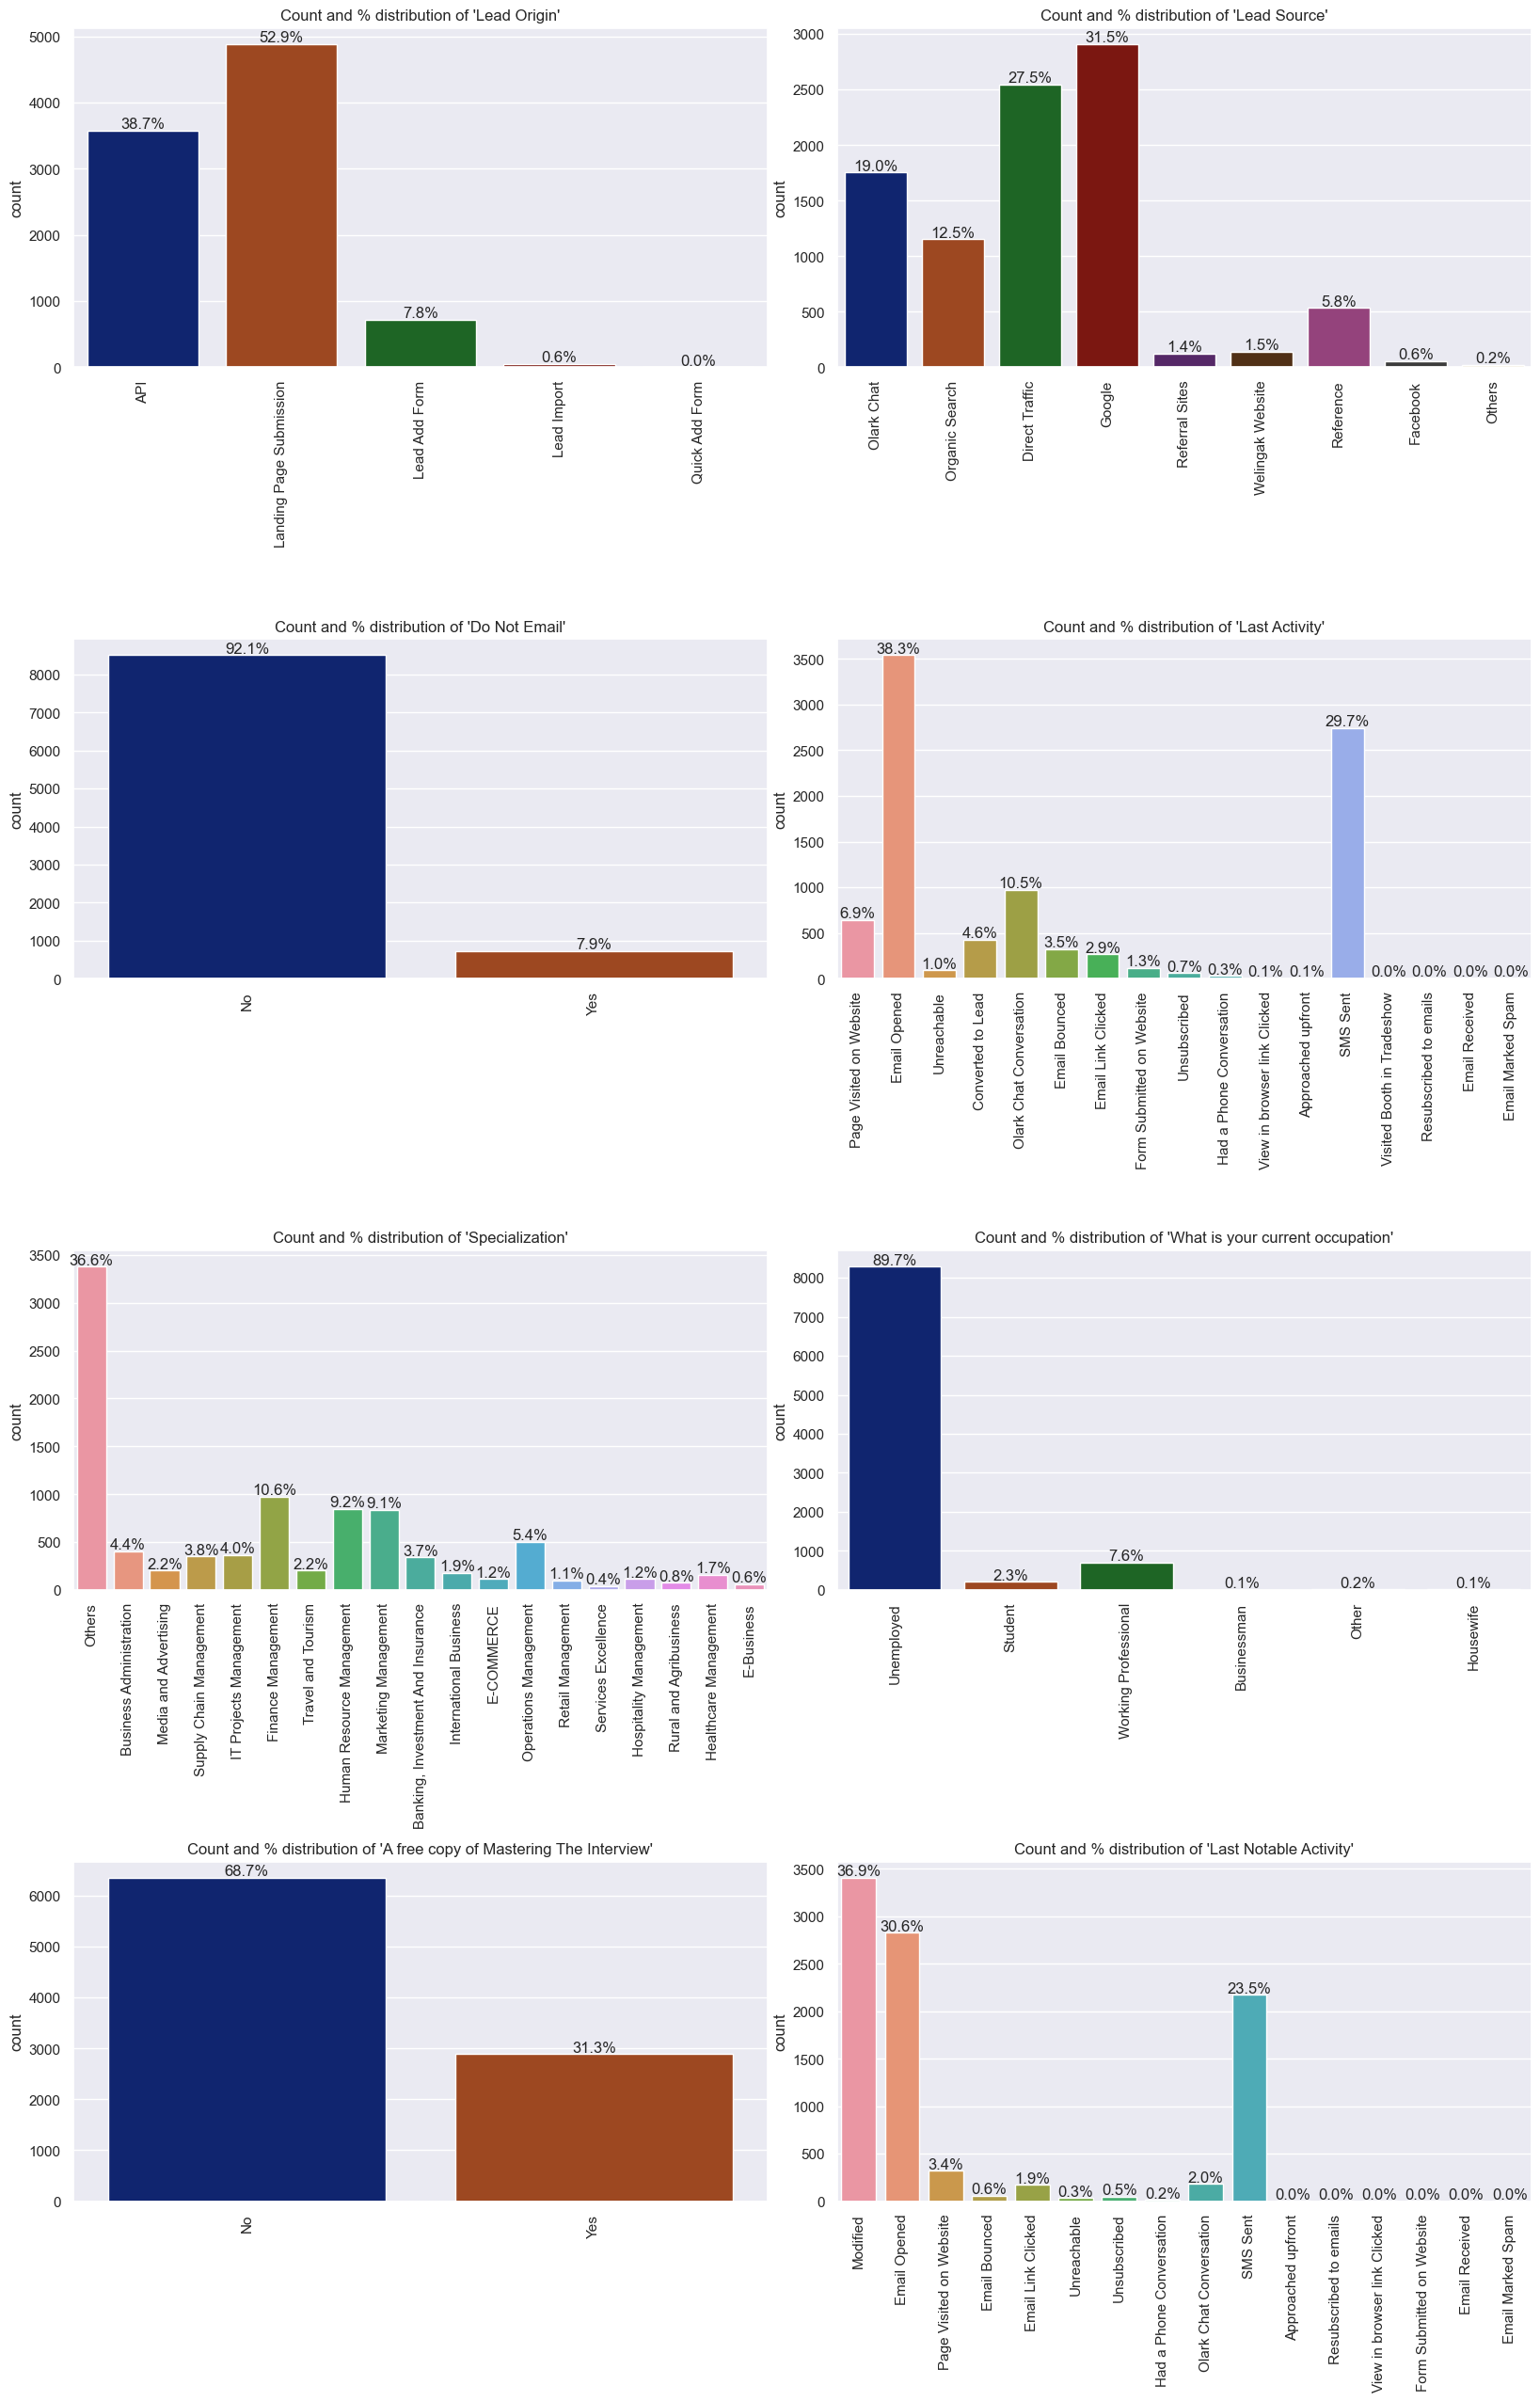

In [742]:
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.1,hspace=0.8)
sns.set( palette="dark")
for ix,col in enumerate(object_type_cols):
    plt.subplot(4,2,ix+1)
    total=len(lead_df[col])
    ax=sns.countplot(x=lead_df[col],data=lead_df)
    plt.title(f"Count and % distribution of '{col}'")
    plt.xticks(rotation=90)
    plt.xlabel(None)
    for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()  

<h3>Inference :</h3>

- `Lead Origin` : Most of the leads (52%) came from "Landing Page Submission". 38.7% came from APIs
- `Lead Source` : Majority of leads are from 'Google', 31.5%. Followed by 'Direct Traffic' 27.5%.
- `What is your Current occupation` : Majority of the Leads are Unemployed. This number is further inflated after imputing Missings into unemployement
- `Do not email` : 92.1% of Leads has opted to not receive emails

We will perform Bivarite of these variables with Conversion to see the conversion rate


<h4>1.4.4 Bivariate Analysis :</h4>

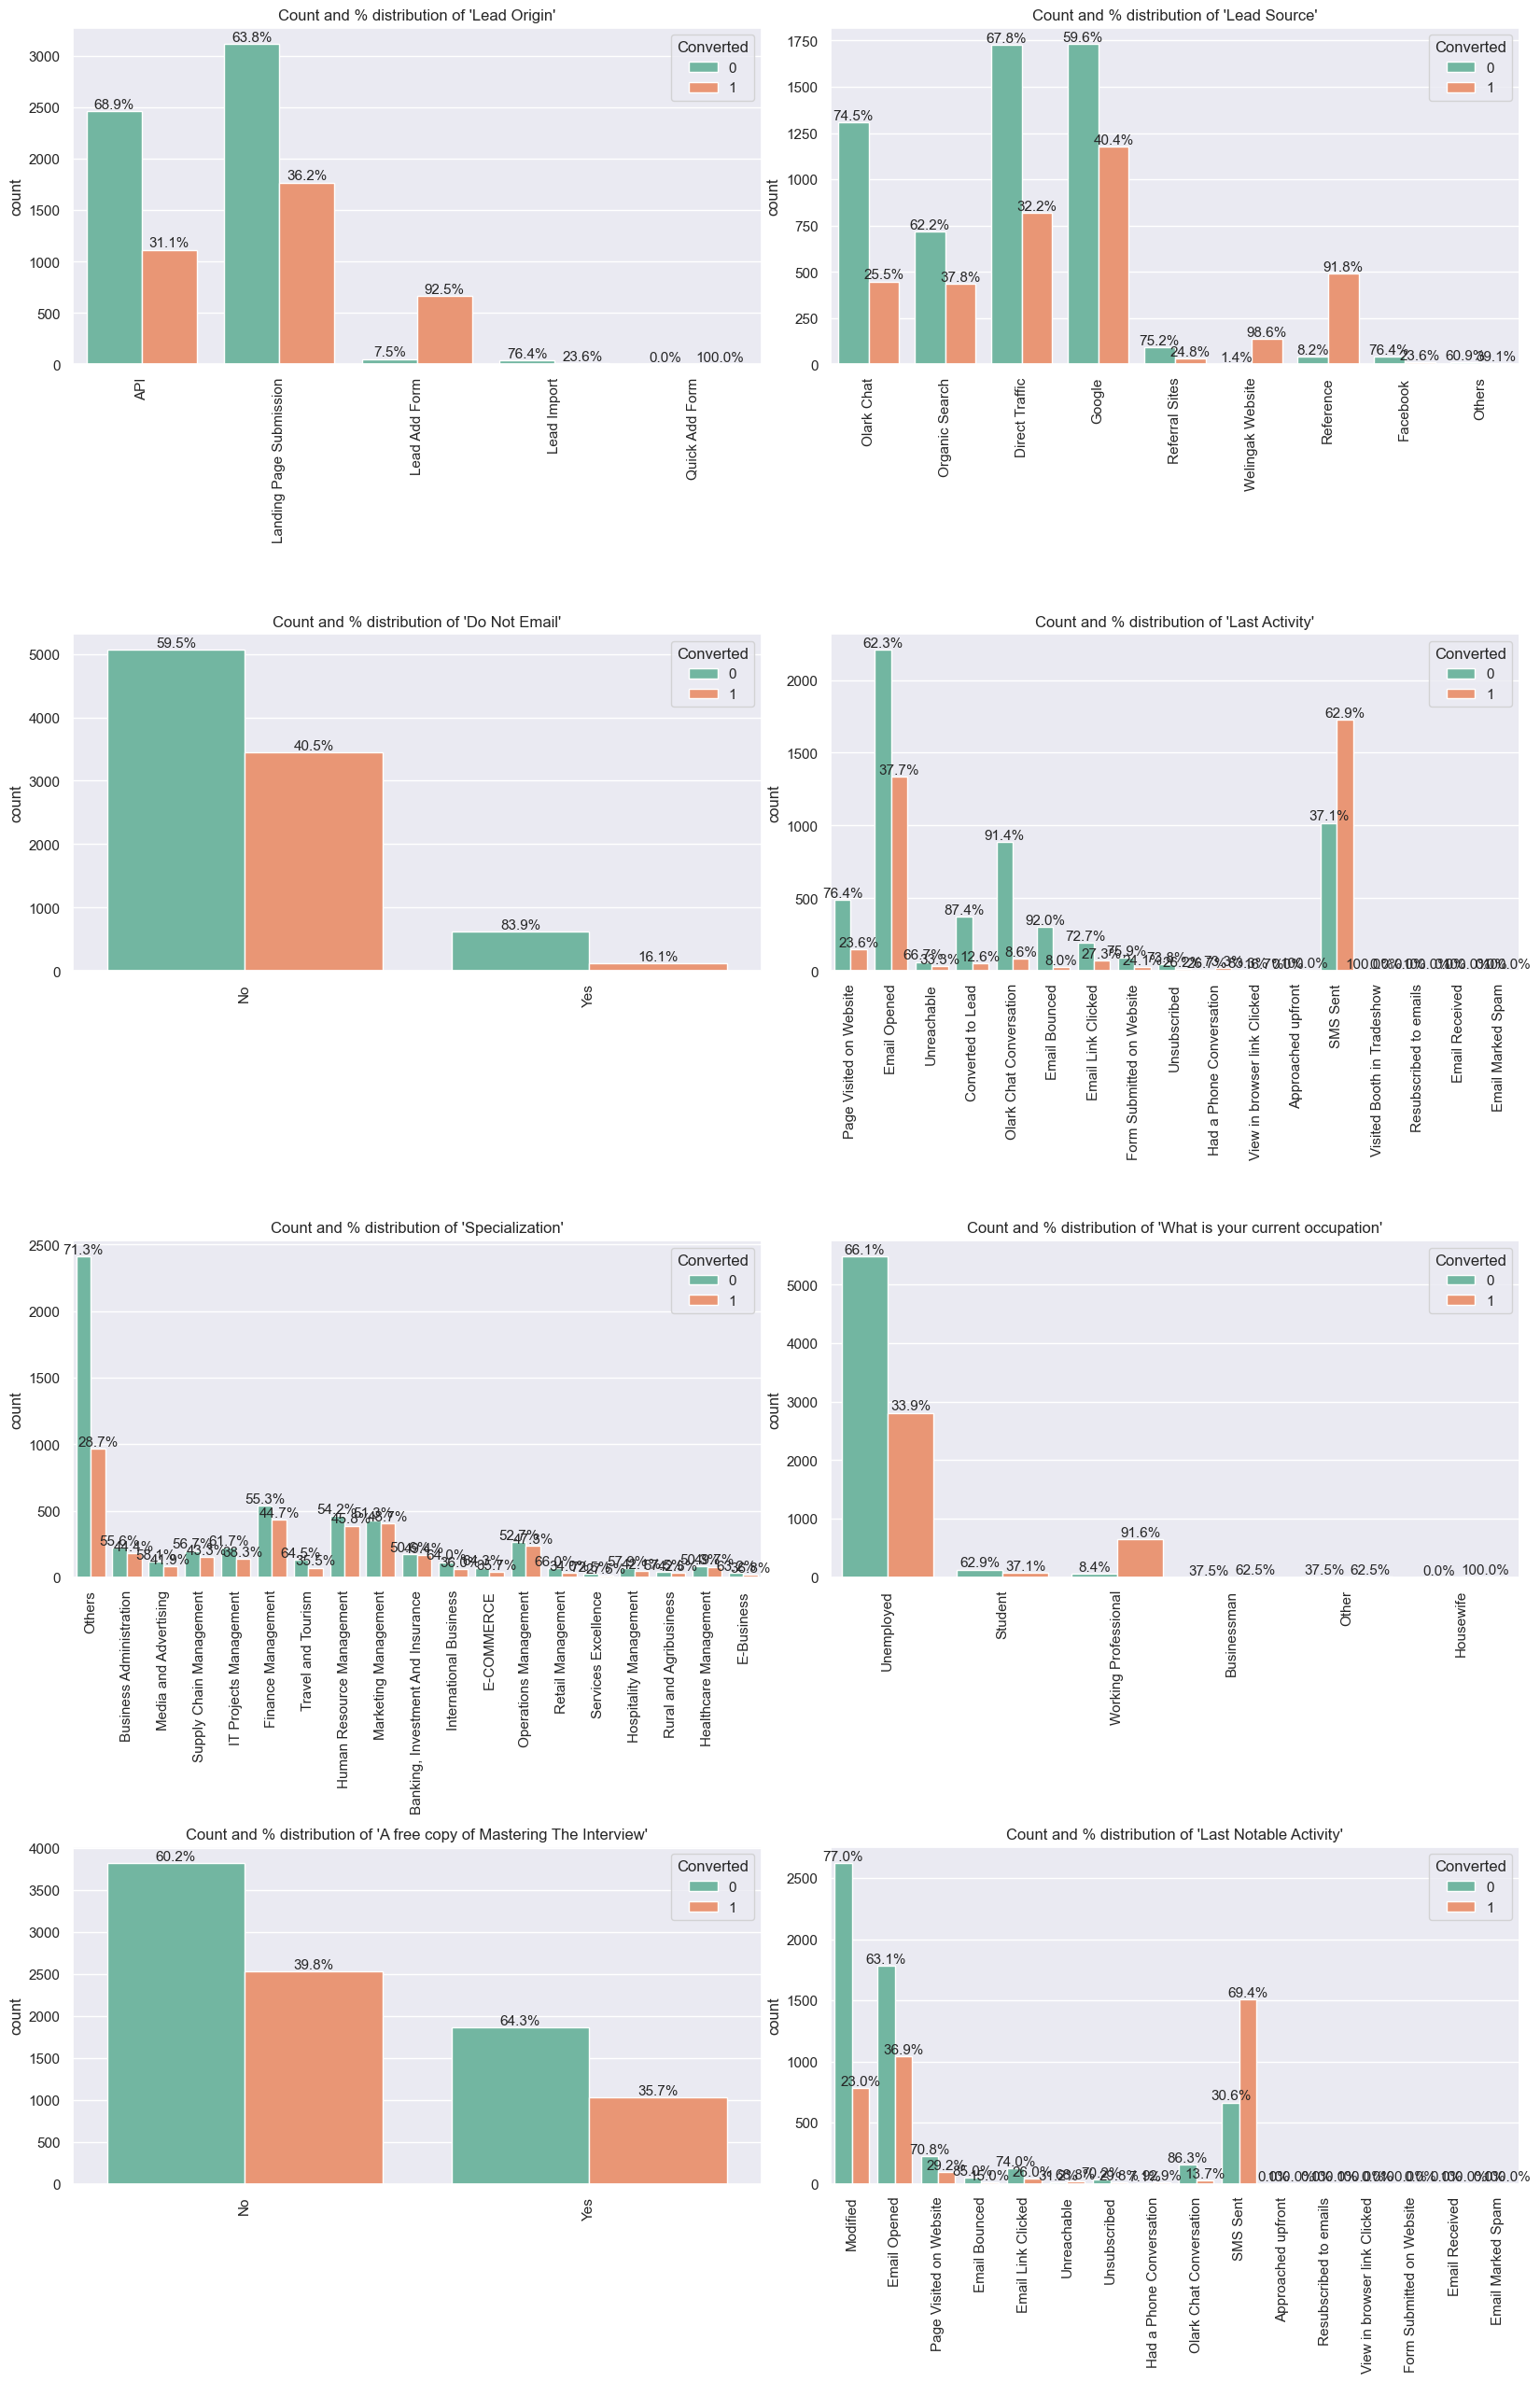

In [743]:
#Plotting Categorical variables with hue as Converted
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.1,hspace=0.8)
sns.set( palette="Set2")
for ix,col in enumerate(object_type_cols):
    plt.subplot(4,2,ix+1)
    total=len(lead_df[col])
    ax=sns.countplot(x=lead_df[col],data=lead_df,hue=lead_df.Converted)
    plt.title(f"Count and % distribution of '{col}'")
    plt.xticks(rotation=90)
    plt.xlabel(None)
    hight = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in hight)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

plt.show()  

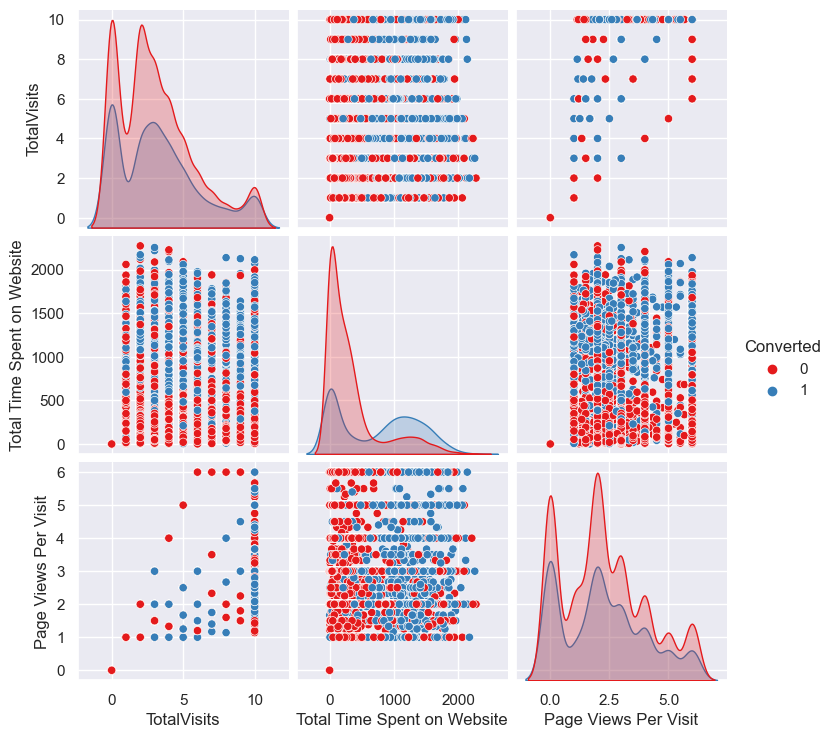

In [744]:
#For numerical variables
sns.pairplot(vars=num_type_cols,data=lead_df,hue="Converted",palette='Set1')

<h4>Inference :</h4>

- In the `Lead Origin` 'Lead Add Form' has a very high conversion rate of 92.5%.
- In `Lead Source category` those through Reference has a conversion rate of 91.8%. X Education should focus on references and probably device an incentive for same. This will boost count in this area more. For the most frequency category 'Google' conversion rate is decently placed at 40.4%, which is above average.
- Amongst Occupation category 'Working Professional' has a high conversion rate of 91.6%. X Education should focus more on working professionals and tailor executive level courses which will attract attention of more 'Working professionals'
- `Last Notable Activity` : 'SMS Sent' has a high conversion rate of 69.4%. Followed by Email Opened at 36.9%

1.4.5 Multivariate

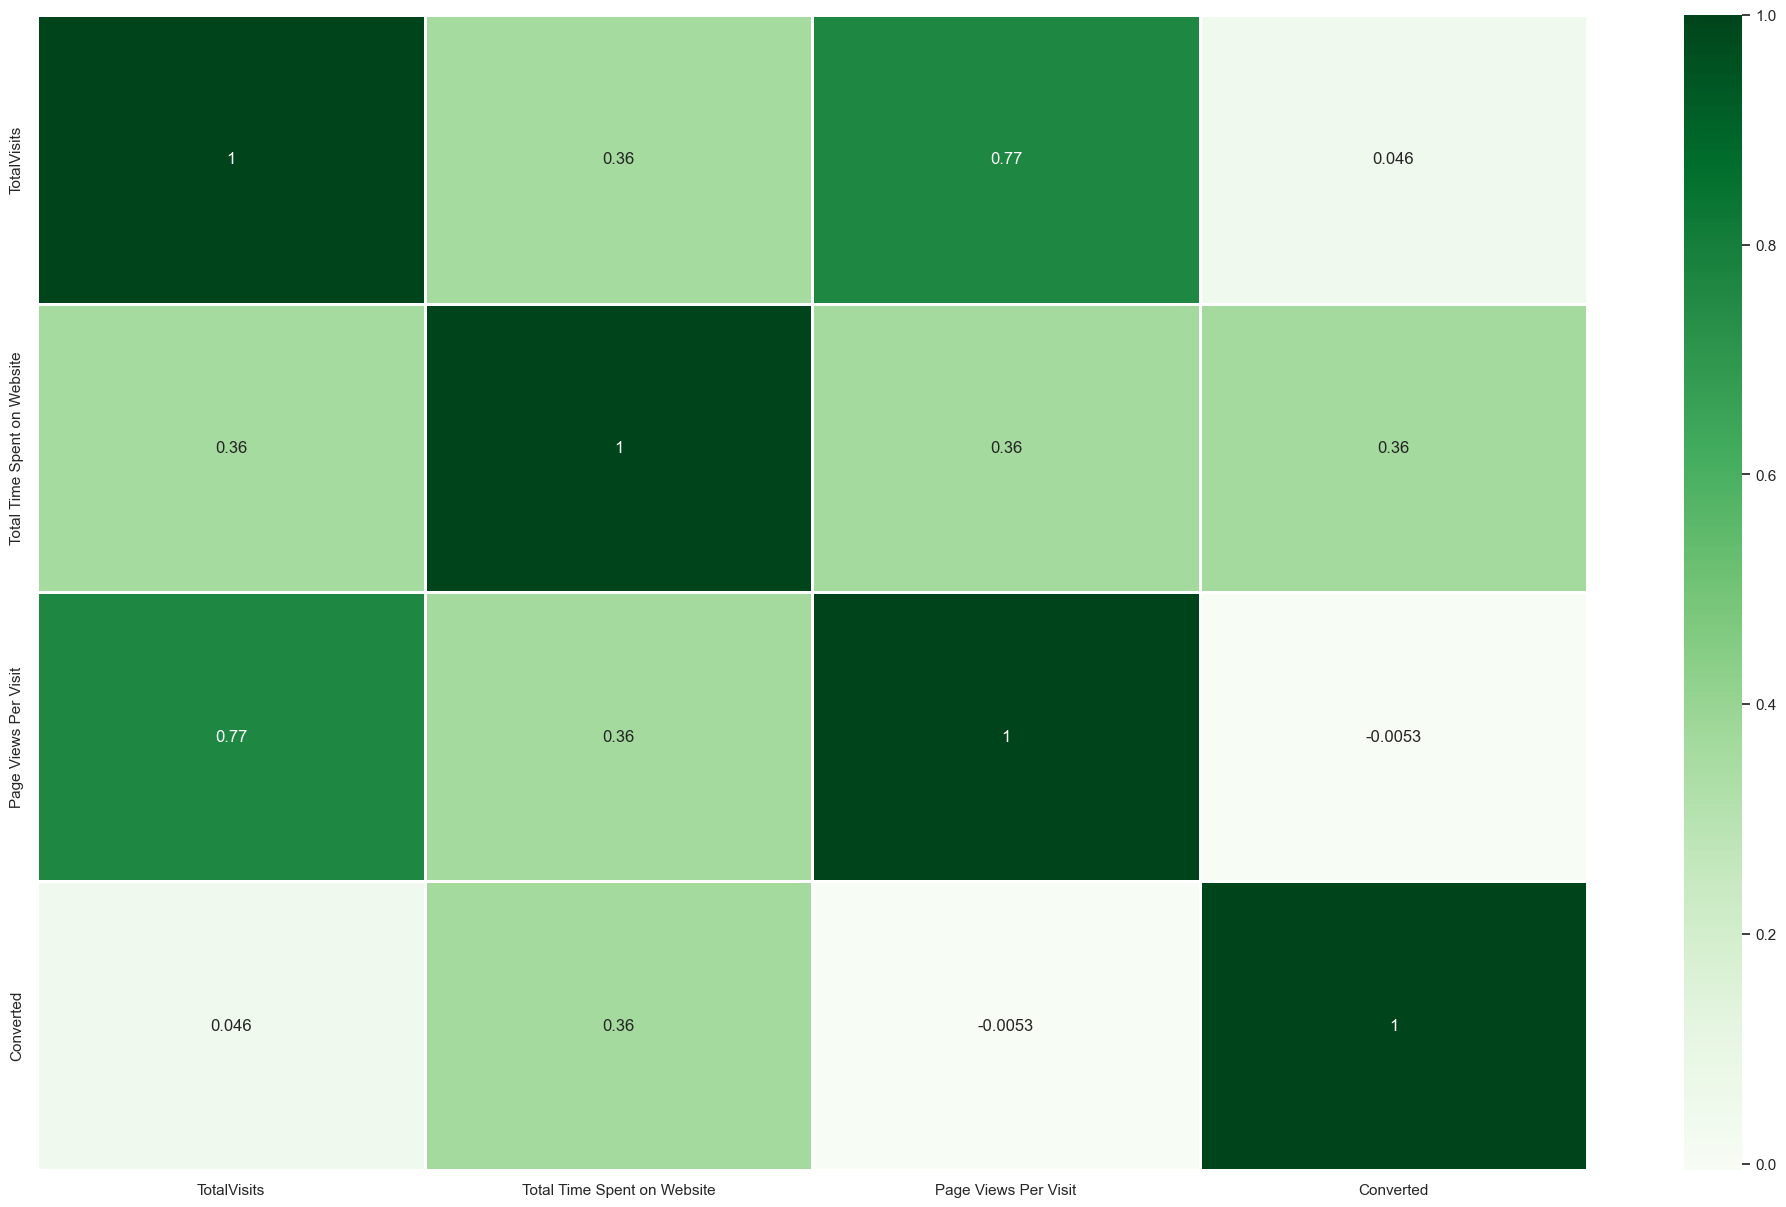

In [745]:
# Looking at the correlation table
num_type_cols=num_type_cols+['Converted']
plt.figure(figsize = (25,15))
sns.heatmap(lead_df[num_type_cols].corr(),cmap='Greens',annot=True,linewidth =1)
plt.show()

`TotalVisit` seems to be strongly correlated with `Page Views Per Visit`

<h2>2. Preparing the data for model training

<h3> 2.1 Dummy variable creation

In [746]:
#creating dummy variables for categorical columns
lead_dummy = pd.get_dummies(lead_df[object_type_cols],drop_first=True,dtype=int)
lead_dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Do Not Email_Yes  \
0                             0                 0   
1                             0                 0   
2                             0                 0   
3                             0                 0   
4                             0                 0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                

In [747]:
#68 Dummy variables created
lead_dummy.shape

(9240, 68)

In [748]:
#drop these categorical variables
lead_df.drop(object_type_cols,inplace=True,axis=1)
lead_df.head(5)

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
0          0          0.0                            0                   0.0
1          0          5.0                          674                   2.5
2          1          2.0                         1532                   2.0
3          0          1.0                          305                   1.0
4          1          2.0                         1428                   1.0

In [749]:
#Concatinate lead_dummy dataset with original dataset
print("Shape before concat :",lead_df.shape)
lead_df=pd.concat([lead_df,lead_dummy], axis=1)
print("Shape after concat :",lead_df.shape)

Shape before concat : (9240, 4)
Shape after concat : (9240, 72)


There are a total of 72 columns as part of dataset.

In [750]:
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Do Not Email_Yes  \
0                             0                 0   
1                             0                 0   
2                             0                 0   
3                             0                 0   
4                             0                 0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                 

We can See there are 9240 Records and 72 Columns <br>
<h3>2.2 Train-Test Split

In [751]:
# Split the dataframe into train and test sets
#creating train and test dataset
df_train, df_test = train_test_split(lead_df, train_size=0.7, random_state=100)

In [752]:
#train size
df_train.shape

(6468, 72)

In [753]:
#test size
df_test.shape

(2772, 72)

<h3>2.3 Scaling the data</h3>
Since we have divided into two df. We can now apply scaling to numerical (non-categorical) variables
<br>We will use MinMax scaling for the same

In [754]:
num_type_cols.remove('Converted')

In [755]:
scaler = MinMaxScaler()
#Other than the following variables all other contains value 0 or 1. 
df_train[num_type_cols]=scaler.fit_transform(df_train[num_type_cols])
#Lets check the normalised values of these variables
df_train[num_type_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  6468.000000                  6468.000000           6468.000000
mean      0.317285                     0.212974              0.374255
std       0.275994                     0.240566              0.295485
min       0.000000                     0.000000              0.000000
25%       0.100000                     0.005282              0.166667
50%       0.300000                     0.108275              0.333333
75%       0.500000                     0.407790              0.500000
max       1.000000                     1.000000              1.000000

We can see that all values are between 0 and 1, which was intended.

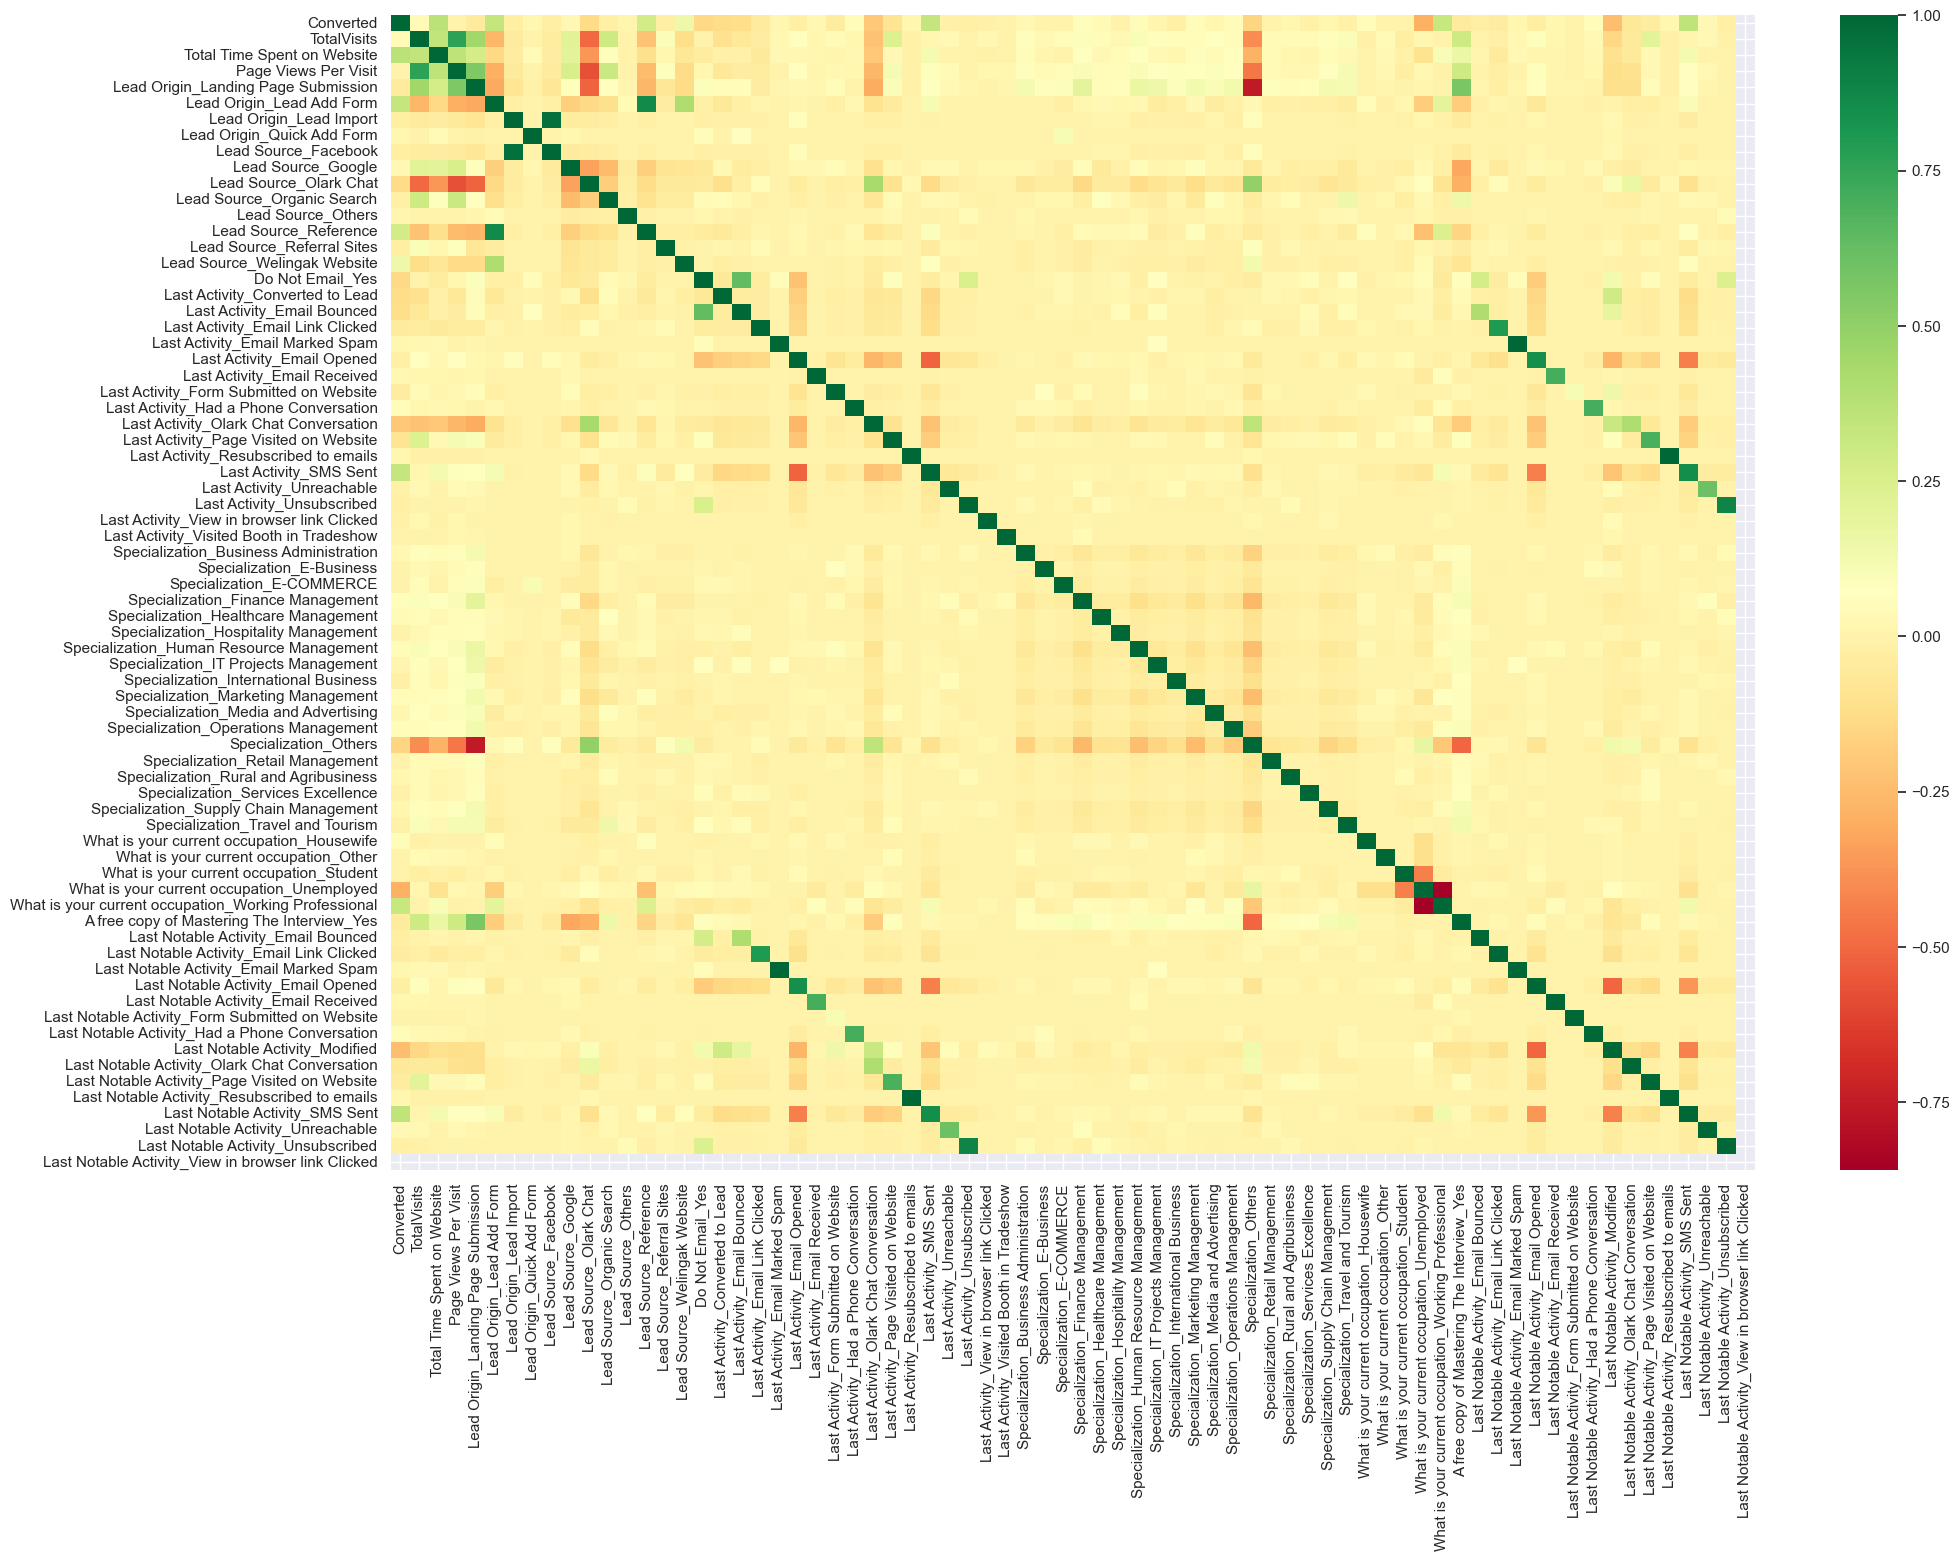

In [756]:
# checking the correlation coefficients on train set to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 15))
sns.heatmap(df_train.corr(), cmap="RdYlGn", annot=False)
plt.show()

In [757]:
#Because of 72 features the heatmap is clumsy. Lets check top features of correlation matrix 
df_train.corr()

Converted  TotalVisits  \
Converted                                            1.000000     0.040111   
TotalVisits                                          0.040111     1.000000   
Total Time Spent on Website                          0.364413     0.344037   
Page Views Per Visit                                -0.008856     0.762929   
Lead Origin_Landing Page Submission                 -0.053174     0.454790   
Lead Origin_Lead Add Form                            0.324869    -0.265512   
Lead Origin_Lead Import                             -0.029406    -0.046947   
Lead Origin_Quick Add Form                           0.015841    -0.000779   
Lead Source_Facebook                                -0.029406    -0.043802   
Lead Source_Google                                   0.033335     0.209831   
Lead Source_Olark Chat                              -0.128933    -0.496883   
Lead Source_Organic Search                          -0.021984     0.297922   
Lead Source_Others                                   0.006872    -0.005436   
Lead Source_Reference                                0.278566    -0.226272   
Lead Source_Referral Sites                          -0.029775     0.094196   
Lead Source_Welingak Website                         0.146773    -0.113081   
Do Not Email_Yes                                    -0.135368    -0.001175   
Last Activity_Converted to Lead                     -0.120888    -0.103019   
Last Activity_Email Bounced                         -0.114994    -0.063658   
Last Activity_Email Link Clicked                    -0.047555    -0.036028   
Last Activity_Email Marked Spam                      0.015841     0.021751   
Last Activity_Email Opened                          -0.019132     0.063296   
Last Activity_Email Received                         0.022405     0.014831   
Last Activity_Form Submitted on Website             -0.032047     0.039972   
Last Activity_Had a Phone Conversation               0.052554     0.017510   
Last Activity_Olark Chat Conversation               -0.203888    -0.221249   
Last Activity_Page Visited on Website               -0.086999     0.233665   
Last Activity_Resubscribed to emails                 0.015841    -0.014297   
Last Activity_SMS Sent                               0.327192     0.013950   
Last Activity_Unreachable                           -0.012711     0.033656   
Last Activity_Unsubscribed                          -0.020021    -0.007049   
Last Activity_View in browser link Clicked          -0.010380     0.020431   
Last Activity_Visited Booth in Tradeshow            -0.009761     0.003727   
Specialization_Business Administration               0.022579     0.059879   
Specialization_E-Business                           -0.008892     0.030905   
Specialization_E-COMMERCE                           -0.005696     0.049720   
Specialization_Finance Management                    0.058021     0.088491   
Specialization_Healthcare Management                 0.039777     0.047691   
Specialization_Hospitality Management               -0.008759     0.029648   
Specialization_Human Resource Management             0.045129     0.102018   
Specialization_IT Projects Management                0.005237     0.057189   
Specialization_International Business               -0.021456     0.053374   
Specialization_Marketing Management                  0.054392     0.049405   
Specialization_Media and Advertising                 0.014114     0.076983   
Specialization_Operations Management                 0.046512     0.048499   
Specialization_Others                               -0.154008    -0.395180   
Specialization_Retail Management                    -0.002118     0.035682   
Specialization_Rural and Agribusiness                0.019042     0.036856   
Specialization_Services Excellence                  -0.012993     0.036212   
Specialization_Supply Chain Management               0.017332     0.059218   
Specialization_Travel and Tourism                   -0.012367     0.093104

Variables under 'Last Activity' and 'Last Notable Activity' seems to be highly correlated. As both of these convay same information

<h2>3. Model Building</h2>
<h3>3.1 Iteration 1 - Building model using all features

In [758]:
#create y_train and X_train
y_train=df_train.pop("Converted")
X_train=df_train

In [759]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [760]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871          0.0                     0.000000              0.000000   
6795          0.4                     0.214349              0.221667   
3516          0.5                     0.046655              0.416667   
8105          0.5                     0.541373              0.833333   
3934          0.0                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
1871                 0                                0   
6795                 0                                0   
3516                 0                                0   
8105                 0                                0   
3934                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
1871                                0                           1   
6795                                0                           1   
3516                                0                           1   
8105                                0                           0   
3934                                0                           1   

      Last Activity_Email Received  Last Activity_Form Submitted on Website  \
1871                             0                                        0   
6795                             0                                        0   
3516                  

In [761]:
#creating first model using sklearn LogisticRegression method
logreg1= LogisticRegression()
logreg1.fit(X_train,y_train)
print("Trainning Accuracy")
print(logreg1.score(X_train,y_train))


Trainning Accuracy
0.8240568954854669


Trainning Accuracy of model is 82.4%

Building model using statsmodel to analyze different stats

In [762]:
#Add constant (for intersept)
X_train_sm1=sm.add_constant(X_train)

In [763]:
#Build the logistic regression model
lm = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()
#Print the summary
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Dec 2023   Deviance:                   1.4129e+05
Time:                        17:17:48   Pearson chi2:                 6.91e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let us compute VIF as well


In [764]:
#Since we will usinf VIF multiple times, lets create a function for the same

def compute_VIF(df):
    vif = pd.DataFrame()
    df2=df.drop('const',axis=1,inplace=False)
    vif['Features'] = df2.columns
    vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [765]:
compute_VIF(X_train_sm1)

Features     VIF
66       Last Notable Activity_Resubscribed to emails     inf
58            Last Notable Activity_Email Marked Spam     inf
26               Last Activity_Resubscribed to emails     inf
19                    Last Activity_Email Marked Spam     inf
63                     Last Notable Activity_Modified  828.92
59                 Last Notable Activity_Email Opened  692.68
67                     Last Notable Activity_SMS Sent  540.14
20                         Last Activity_Email Opened  259.25
27                             Last Activity_SMS Sent  231.81
24              Last Activity_Olark Chat Conversation  101.15
53         What is your current occupation_Unemployed  100.69
65      Last Notable Activity_Page Visited on Website   82.54
54  What is your current occupation_Working Profes...   79.36
25              Last Activity_Page Visited on Website   74.69
16                    Last Activity_Converted to Lead   48.99
57           Last Notable Activity_Email Link Clicked   44.38
64      Last Notable Activity_Olark Chat Conversation   43.20
17                        Last Activity_Email Bounced   40.13
18                   Last Activity_Email Link Clicked   32.73
52            What is your current occupation_Student   23.56
5                             Lead Origin_Lead Import   16.82
7                                Lead Source_Facebook   16.80
4                           Lead Origin_Lead Add Form   15.76
69                 Last Notable Activity_Unsubscribed   15.74
56                Last Notable Activity_Email Bounced   15.15
22            Last Activity_Form Submitted on Website   14.68
12                              Lead Source_Reference   13.46
29                         Last Activity_Unsubscribed   11.46
28                          Last Activity_Unreachable   11.09
44                              Specialization_Others    9.47
68                  Last Notable Activity_Unreachable    8.57
62     Last Notable Activity_Had a Phone Conversation    5.80
23             Last Activity_Had a Phone Conversation    5.68
3                 Lead Origin_Landing Page Submission    4.07
14                       Lead Source_Welingak Website    3.99
35                  Specialization_Finance Management    3.63
9                              Lead Source_Olark Chat    3.55
2                                Page Views Per Visit    3.42
41                Specialization_Marketing Management    3.36
38           Specialization_Human Resource Management    3.32
0                                         TotalVisits    2.86
50          What is your current occupation_Housewife    2.53
8                                  Lead Source_Google    2.52
43               Specialization_Operations Management    2.51
51              What is your current occupation_Other    2.36
60               Last Notable Activity_Email Received    2.35
21                       Last Activity_Email Received    2.34
55         A free copy of Mastering The Interview_Yes    2.19
32             Specialization_Business Administration    2.17
39              Specialization_IT Projects Management    2.02
48             Specialization_Supply Chain Management    2.02
15                                   Do Not Email_Yes    2.02
30         Last Activity_View in browser link Clicked    1.84
10                         Lead Source_Organic Search    1.63
49                  Specialization_Travel and Tourism    1.62
42               Specialization_Media and Advertising    1.58
40              Specialization_International Business    1.52
36               Specialization_Healthcare Management    1.44
37              Specialization_Hospitality Management    1.38
34                          Specialization_E-COMMERCE    1.38
61    Last Notable Activity_Form Submitted on Website    1.36
1                         Total Time Spent on Website    1.31
45                   Specialization_Retail Management    1.30
46              Specialization_Rural and Agribusiness    1.21
31           La

For some of the features VIF is infinite indicating very strong muticollinearity.<br>
Even though Accuracy is good and p-value indicate significance we cannot accept this model. <br>
Since there are more than 70 features and eliminating feature one by one will be tiresome we will use RFE and select best 15 features<br>
<h3>3.2 Iteration 2 - Using RFE fo select top 15 features</h3>

In [766]:
# Lets use RFE to reduce variables 
logreg2 = LogisticRegression()
logreg2.fit(X_train,y_train)
rfe = RFE(logreg2, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)
#Let's check the variables selected and their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Others', False, 31),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Marked Spam', False, 36),
 ('Last Activity_Email Opened', False, 42),
 ('Last Activity_Email Received', False, 40),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Had a Pho

In [767]:
#Select the columns included in RFE
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [768]:
#these variables are not selected 
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', '

Building model starting with these variables using statsmodels<br>We are using stats model so that various statistical values can be viewed 

In [769]:
#create dataset using rfe_cols
X_train_rfe2=X_train[rfe_cols]

#Add constant (for intersept)
X_train_rfe2=sm.add_constant(X_train_rfe2)

#Build the logistic regression model
lm2 = sm.GLM(y_train,X_train_rfe2,family = sm.families.Binomial()).fit()

#Print the summary
print(lm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.6
Date:                Tue, 19 Dec 2023   Deviance:                       5357.2
Time:                        17:18:05   Pearson chi2:                 7.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3941
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [770]:
compute_VIF(X_train_rfe2)

Features   VIF
1                 Lead Origin_Landing Page Submission  2.79
12                     Last Notable Activity_Modified  2.67
7                               Specialization_Others  2.16
6               Last Activity_Olark Chat Conversation  1.89
0                         Total Time Spent on Website  1.86
11                 Last Notable Activity_Email Opened  1.84
2                           Lead Origin_Lead Add Form  1.43
13      Last Notable Activity_Olark Chat Conversation  1.36
3                        Lead Source_Welingak Website  1.27
5                     Last Activity_Converted to Lead  1.23
4                                    Do Not Email_Yes  1.18
9   What is your current occupation_Working Profes...  1.17
14      Last Notable Activity_Page Visited on Website  1.10
10           Last Notable Activity_Email Link Clicked  1.06
8           What is your current occupation_Housewife  1.01

`What is your current occupation_Housewife` has a high value of p-value of 0.999. <br>
We will drop this feature and recreate model<br>
<h3>Iteration 3 - Third Model 

In [771]:
#Drop feature 'What is your current occupation_Housewife'
X_train_rfe3 = X_train_rfe2.drop(['What is your current occupation_Housewife'],axis=1)
#Build the model
lm3 = sm.GLM(y_train,X_train_rfe3,family = sm.families.Binomial()).fit()

#Print the summary
print(lm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.6
Date:                Tue, 19 Dec 2023   Deviance:                       5371.2
Time:                        17:18:05   Pearson chi2:                 7.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3928
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [772]:
#check VIF 
compute_VIF(X_train_rfe3)

Features   VIF
1                 Lead Origin_Landing Page Submission  2.79
11                     Last Notable Activity_Modified  2.67
7                               Specialization_Others  2.16
6               Last Activity_Olark Chat Conversation  1.89
0                         Total Time Spent on Website  1.86
10                 Last Notable Activity_Email Opened  1.84
2                           Lead Origin_Lead Add Form  1.43
12      Last Notable Activity_Olark Chat Conversation  1.36
3                        Lead Source_Welingak Website  1.27
5                     Last Activity_Converted to Lead  1.23
4                                    Do Not Email_Yes  1.18
8   What is your current occupation_Working Profes...  1.17
13      Last Notable Activity_Page Visited on Website  1.10
9            Last Notable Activity_Email Link Clicked  1.05

In [773]:
lm3.params

const                                                   0.719471
Total Time Spent on Website                             3.978878
Lead Origin_Landing Page Submission                    -1.426060
Lead Origin_Lead Add Form                               2.690811
Lead Source_Welingak Website                            2.516484
Do Not Email_Yes                                       -1.617348
Last Activity_Converted to Lead                        -1.080422
Last Activity_Olark Chat Conversation                  -0.991169
Specialization_Others                                  -1.089013
What is your current occupation_Working Professional    2.611332
Last Notable Activity_Email Link Clicked               -1.825428
Last Notable Activity_Email Opened                     -1.368522
Last Notable Activity_Modified                         -1.754393
Last Notable Activity_Olark Chat Conversation          -1.364076
Last Notable Activity_Page Visited on Website          -1.623070
dtype: float64

This seems to be a acceptable model :
 - p-value of all features are under 0.05 indicating they are significant
 - None of the VIF is >5 

We will proceed with this model and run our model Evaluation

<h2>4. Model Evaluation</h2>

- Accuracy
- Confusion Matrix
- Sensitivity and Specificity
- ROC plot and optimal point
- Precision and Recall

In [774]:
# Getting the predicted values on the train set
y_train_pred = lm3.predict(X_train_rfe3) 
y_train_pred[:10]

1871    0.343203
6795    0.090195
3516    0.174736
8105    0.809609
3934    0.106792
4844    0.989388
3297    0.127166
8071    0.992343
987     0.144665
7423    0.914330
dtype: float64

In [775]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34320343, 0.09019493, 0.17473557, 0.80960863, 0.1067921 ,
       0.98938847, 0.12716589, 0.99234265, 0.14466462, 0.91432988])

In [776]:
# Creating another dataframe with 'Converted' and the predicted probability

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

#creating another column Predicted based on Conversion_Prob. To start with we will use probablity of 0.5 to decide Conversion 
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.343203         1871          0
1          0        0.090195         6795          0
2          0        0.174736         3516          0
3          0        0.809609         8105          1
4          0        0.106792         3934          0

<h3>4.2 Accuracy </h3>

In [777]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.807204700061843


Accuracy is 80.7% which is a good number

<h3>4.3 Creating confusion metric</h3>

In [778]:
# Confusion metric  (Actual / predicted)

confusion_mtrx = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion_mtrx)

[[3569  433]
 [ 814 1652]]


<h3> 4.4 Other matrics (FN TN FP TP)

In [779]:
TP = confusion_mtrx[1,1] # true positive 
TN = confusion_mtrx[0,0] # true negatives
FP = confusion_mtrx[0,1] # false positives
FN = confusion_mtrx[1,0] # false negatives

In [780]:
#Sensitivity
TP / float(TP+FN)

0.6699107866991079

In [781]:
#Specificity
TN / float(TN+FP)

0.8918040979510244

In [782]:
#precision
TP/(TP+FP)

0.7923261390887291

In [783]:
#Recall
TP / float(TP+FN)

0.6699107866991079

<h4>Inference :</h4>

- specificity is very hight at 89.2% whereas, sensitivity is quite low at 66.9%
- precision is decent at 79.2% However, Recall is low low at 66.9%
- Since FN are costly to company as they will lead to loss of potential customers. 
- We need lower FN or in term of metrics we need higher Sensitivity/Recall and accuracy
- We need to tryout a different probablity than 0.5 to reduce FN

0.5 was just arbitrary to loosely check the model performace. But in order to get better result, you need to optimise the threshold.<br>
Let's plot an ROC curve to see what AUC we get.

<h3>4.5 Plotting ROC curve</h3>

In [784]:
# ROC function

def plot_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [785]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

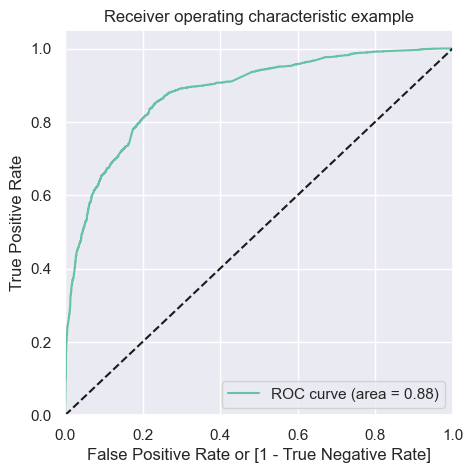

In [786]:
# Drawing ROC curve for Train Set
plot_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

The area under the curve of the ROC is 0.88 which is good. We seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

<h3>4.6 Finding optimal point

In [787]:
#creating columns with different probability cutoffs 

rng = [float(x)/10 for x in range(10)]
for i in rng:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.343203         1871          0    1    1    1    1    0   
1          0        0.090195         6795          0    1    0    0    0    0   
2          0        0.174736         3516          0    1    1    0    0    0   
3          0        0.809609         8105          1    1    1    1    1    1   
4          0        0.106792         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [788]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.562925  0.977291  0.307596
0.2   0.2  0.768553  0.892539  0.692154
0.3   0.3  0.797619  0.855637  0.761869
0.4   0.4  0.806741  0.782238  0.821839
0.5   0.5  0.807205  0.669911  0.891804
0.6   0.6  0.804576  0.603001  0.928786
0.7   0.7  0.784941  0.516626  0.950275
0.8   0.8  0.764378  0.426196  0.972764
0.9   0.9  0.717378  0.276967  0.988756


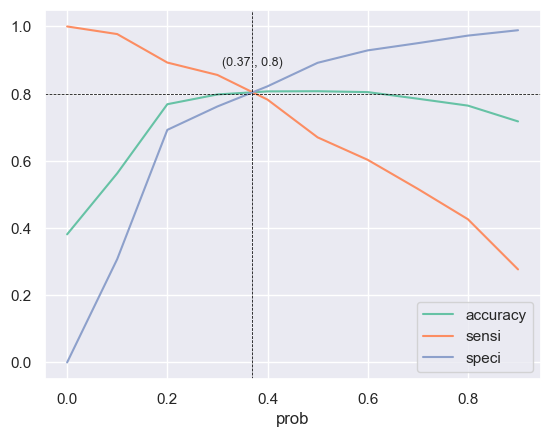

In [789]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='black',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='black',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


As per the plot 0.37 is the optimal probability threshold. <br>
We will recalculate final predicted using this cutoff

In [790]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.37 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.343203         1871                0
1          0        0.090195         6795                0
2          0        0.174736         3516                0
3          0        0.809609         8105                1
4          0        0.106792         3934                0

<h3>4.6 Re-calculating all metrices

In [791]:
# Checking the overall accuracy first
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8038033395176253


Previous accuracy was 80.72%. New accuracy is 80.38%<br>There is not any significant drop in the accuracy score<br>Lets analyze other metrices

In [792]:
# Confusion metric  (Actual / predicted)

confusion_mtrx2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
print(confusion_mtrx2)

[[3207  795]
 [ 474 1992]]


In [793]:
# Let's evaluate the other metrics as well

TP = confusion_mtrx2[1,1] # true positive 
TN = confusion_mtrx2[0,0] # true negatives
FP = confusion_mtrx2[0,1] # false positives
FN = confusion_mtrx2[1,0] # false negatives

print("Sensitivity : ",TP / (TP+FN))
print("Specificity : ",TN/(TN+FP))
print("Precision : ",TP / (TP+FP))
print("Recall : ",TP / (TP+FN))

Sensitivity :  0.8077858880778589
Specificity :  0.8013493253373314
Precision :  0.7147470398277718
Recall :  0.8077858880778589


Lets also check Precision/Recall plot

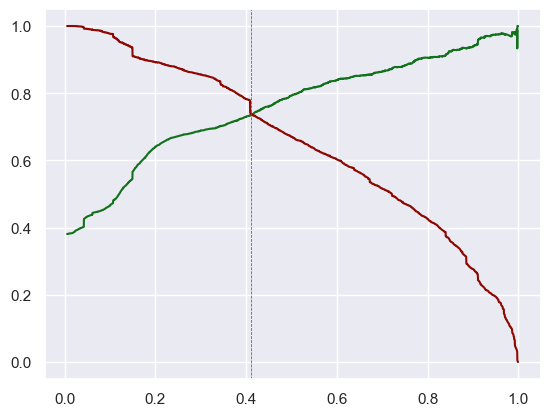

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')

plt.show()

Precision/Recall intersection is at 0.41. We can use this to optimise the performance of model

In [ ]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_mtrx_pr = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
confusion_mtrx_pr

array([[3345,  657],
       [ 640, 1826]], dtype=int64)

In [824]:
# Let's evaluate the other metrics as well

TP = confusion_mtrx_pr[1,1] # true positive 
TN = confusion_mtrx_pr[0,0] # true negatives
FP = confusion_mtrx_pr[0,1] # false positives
FN = confusion_mtrx_pr[1,0] # false negatives

print(metrics.accuracy_score(y_train_precision_recall["Converted"], y_train_precision_recall["final_predicted"]))
print("Sensitivity : ",TP / (TP+FN))
print("Specificity : ",TN/(TN+FP))
print("Precision : ",TP / (TP+FP))
print("Recall : ",TP / (TP+FN))

0.8038033395176253
Sensitivity :  0.740470397404704
Specificity :  0.835832083958021
Precision :  0.7354007249295207
Recall :  0.740470397404704


Using the threshold of precision/Recall Sensitivity(& recall) dropped to ~74%<br>As pointed out earlier, FN are costly to the company. <br>So we will choose the probability which has lesser FN (and hence higher Sensitivity and Recall ) i.e. cutoff of 0.37

<h2>5. Prediction on test data set</h2>

We will now make prediction on test data set.

In [794]:
df_test.head()

Converted  TotalVisits  Total Time Spent on Website  \
4269          1          8.0                         1011   
2376          1          0.0                            0   
7766          1          5.0                           59   
9199          0          0.0                            0   
4359          1          0.0                            0   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4269                   6.0                                    0   
2376                   0.0                                    0   
7766                   5.0                                    0   
9199                   0.0                                    0   
4359                   0.0                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
4269                          0                        0   
2376                          1                        0   
7766                          0                        0   
9199                          0                        0   
4359                          1                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4269                           0                     0                   0   
2376                           0                     0                   0   
7766                           0                     0                   1   
9199                           0                     0                   0   
4359                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                       0                           0                   0   
2376                       0                           0                   0   
7766                       0                           0                   0   
9199                       1                           0                   0   
4359                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4269                      0                           0   
2376                      1                           0   
7766                      0                           0   
9199                      0                           0   
4359                      1                           0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4269                             0                 0   
2376                             0                 0   
7766                             0                 0   
9199                             0                 0   
4359                             0                 0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
4269                                 0                                0   
2376                                 0                                0   
7766                                 0                                0   
9199                                 0                                0   
4359                                 0                                0   

      Last Activity_Email Opened  Last Activity_Email Received  \
4269                           0                             0   
2376                           0                             0   
7766                           0                             0   
9199                           0                             0   
4359                           

In [795]:
y_test = df_test.pop("Converted")
X_test = df_test
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269          8.0                         1011                   6.0   
2376          0.0                            0                   0.0   
7766          5.0                           59                   5.0   
9199          0.0                            0                   0.0   
4359          0.0                            0                   0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
4269                        0                           0   
2376                        0                           0   
7766                        0                           0   
9199                        0                           0   
4359                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
4269                     0                   0                       0   
2376                     0                   0                       0   
7766                     0                   1                       0   
9199                     0                   0                       1   
4359                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
4269                           0                   0                      0   
2376                           0                   0                      1   
7766                           0                   0                      0   
9199                           0                   0                      0   
4359                           0                   0                      1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
4269                           0                             0   
2376                           0                             0   
7766                           0                             0   
9199                           0                             0   
4359                           0                             0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
4269                 0                                0   
2376                 0                                0   
7766                 0                                0   
9199                 0                                0   
4359                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4269                            0                                 0   
2376                            0                                 0   
7766                            0                                 0   
9199                            0                                 0   
4359                            0                                 0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
4269                                0                           0   
2376                                0                           0   
7766                                0                           0   
9199                                0                           0   
4359                                0                           1   

      Last Activity_Email Received  Last Activity_Form Submitted on Website  \
4269                             0                                        0   
2376                             0                                        0   
7766                  

In [796]:
X_test.shape

(2772, 71)

In [797]:
y_test.shape

(2772,)

Scaling test data set

In [798]:
scaler = MinMaxScaler()
#Other than the following variables all other contains value 0 or 1. 
X_test[num_type_cols]=scaler.fit_transform(X_test[num_type_cols])
#Lets check the normalised values of these variables
X_test[num_type_cols].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  2772.000000                  2772.000000           2772.000000
mean      0.319408                     0.220425              0.379574
std       0.276465                     0.244740              0.299134
min       0.000000                     0.000000              0.000000
25%       0.100000                     0.005770              0.166667
50%       0.300000                     0.114514              0.333333
75%       0.500000                     0.421216              0.583333
max       1.000000                     1.000000              1.000000

scaling has been applied to numerical columns and these has been normalized 

In [799]:
rfe_cols=list(X_train_rfe3.columns)
rfe_cols.remove('const')
rfe_cols

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Olark Chat Conversation',
 'Specialization_Others',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [800]:
#adding contant to X_test
X_test=X_test[rfe_cols]
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [801]:
# making prediction using model 3
y_test_pred = lm3.predict(X_test_sm)
# top 10 columns
y_test_pred[:10]

4269    0.804698
2376    0.910623
7766    0.968781
9199    0.042488
4359    0.885112
9186    0.592479
1631    0.428955
8963    0.220154
8007    0.050504
5324    0.395554
dtype: float64

In [802]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.804698
2376  0.910623
7766  0.968781
9199  0.042488
4359  0.885112

In [803]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [804]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted         0
4269          1  0.804698
2376          1  0.910623
7766          1  0.968781
9199          0  0.042488
4359          1  0.885112

In [805]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

Converted  Converted_Prob
4269          1        0.804698
2376          1        0.910623
7766          1        0.968781
9199          0        0.042488
4359          1        0.885112

In [806]:
# taking sensitivity-specificity method at 0.37 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

Converted  Converted_Prob  final_predicted
4269          1        0.804698                1
2376          1        0.910623                1
7766          1        0.968781                1
9199          0        0.042488                0
4359          1        0.885112                1

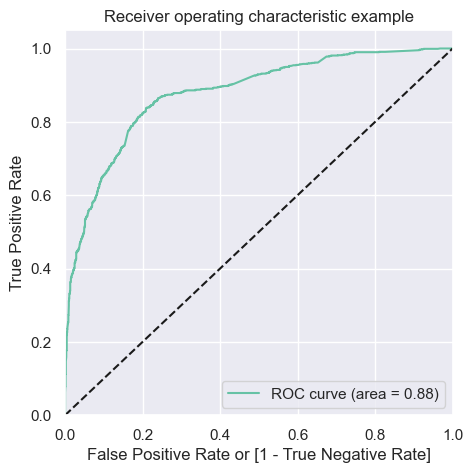

In [807]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

plot_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

Area under ROC is 0.88 which is a good value

<h3>6.2 Evaluation on test data set</h3>

In [808]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_mtrx3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion_mtrx3

array([[1361,  316],
       [ 205,  890]], dtype=int64)

False Negatives are comparitevely low, which is a good sign

In [815]:
# Checking the overall accuracy 
print(metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"]))

0.812049062049062


In [809]:
# Let's evaluate the other metrics as well

TP = confusion_mtrx3[1,1] # true positive 
TN = confusion_mtrx3[0,0] # true negatives
FP = confusion_mtrx3[0,1] # false positives
FN = confusion_mtrx3[1,0] # false negatives

print("Sensitivity : ",TP / (TP+FN))
print("Specificity : ",TN/(TN+FP))
print("Precision : ",TP / (TP+FP))
print("Recall : ",TP / (TP+FN))

Sensitivity :  0.8127853881278538
Specificity :  0.8115682766845558
Precision :  0.7379767827529021
Recall :  0.8127853881278538


<h2>Inference :</h2>

- Metrices on test dataset is as follows :

1. Accuracy : 81.20%
2. Sensitivity :  81.27%
3. Specificity :  81.15%
4. Precision :  73.79%
5. Recall :  81.27%
6. Area under ROC : 0.88

- We can see all of the metrices are close to 80%. False negative has also gone down and is evident from increase in Sensitivity/Recall

In [810]:
# features and their coefficicent from final model
parameters=lm3.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                             3.978878
Lead Origin_Lead Add Form                               2.690811
What is your current occupation_Working Professional    2.611332
Lead Source_Welingak Website                            2.516484
const                                                   0.719471
Last Activity_Olark Chat Conversation                  -0.991169
Last Activity_Converted to Lead                        -1.080422
Specialization_Others                                  -1.089013
Last Notable Activity_Olark Chat Conversation          -1.364076
Last Notable Activity_Email Opened                     -1.368522
Lead Origin_Landing Page Submission                    -1.426060
Do Not Email_Yes                                       -1.617348
Last Notable Activity_Page Visited on Website          -1.623070
Last Notable Activity_Modified                         -1.754393
Last Notable Activity_Email Link Clicked               -1.825428
dtype: float64

<h2>Adding `Prospect ID` and Lead score to test dataset</h2>

In [812]:
# Putting Prospect ID to index
y_pred_final['Prospect ID'] = y_pred_final.index
y_pred_final.head()

Converted  Converted_Prob  final_predicted  Prospect ID
4269          1        0.804698                1         4269
2376          1        0.910623                1         2376
7766          1        0.968781                1         7766
9199          0        0.042488                0         9199
4359          1        0.885112                1         4359

In [813]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Converted  Converted_Prob  final_predicted  Prospect ID  Lead Score
4269          1        0.804698                1         4269          80
2376          1        0.910623                1         2376          91
7766          1        0.968781                1         7766          97
9199          0        0.042488                0         9199           4
4359          1        0.885112                1         4359          89

<h2>Summary :</h2>

- Model has following metrices on train dataset :
1. Accuracy : 80.38%
2. Sensitivity :  80.78%
3. Specificity :  80.18%
4. Precision :  71.5%
5. Recall :  80.78%
6. Area under ROC : 0.88

- Metrices on test dataset is as follows :

1. Accuracy : 81.20%
2. Sensitivity :  81.27%
3. Specificity :  81.15%
4. Precision :  73.79%
5. Recall :  81.27%
6. Area under ROC : 0.88

- Top three features that contribute to the model are `Total Time Spent on Website`, `Lead Origin_Lead Add Form` and `What is your current occupation_Working Professional`
- Probability cutoff of 0.37 was selected. Any probability above this is predicted as converted (1) and below this are not-converted
- There probability values when scaled to the range 0-100 can be deemed as Lead Score. Higher the Lead score value more is the change of conversion and vice versa.
